In [0]:
%pip install xgboost

Python interpreter will be restarted.
Collecting xgboost
 Downloading xgboost-1.6.1-py3-none-manylinux2014_x86_64.whl (192.9 MB)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from xgboost) (1.19.2)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.8/site-packages (from xgboost) (1.6.2)
Installing collected packages: xgboost
Successfully installed xgboost-1.6.1
WARNING: You are using pip version 21.0.1; however, version 22.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-772125a5-3304-45e4-9c8a-3a6d67aed350/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
### Import libraries
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.window import *
import pyspark.sql.functions as F
import math
import itertools

# from databricks.feature_store import *

from pyspark.sql.types import *
from pyspark.sql.functions import when, lit, substring, col, coalesce, lead, datediff, expr, posexplode, year, concat, lpad, month, last_day, add_months, trunc, date_add, greatest
from pyspark.sql.window import Window

### Import libraries
import pandas as pd
from datetime import date, datetime
import numpy as np
from random import seed, choice, randrange
from sklearn.metrics import mean_tweedie_deviance, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RandomizedSearchCV, GridSearchCV

from matplotlib import pyplot as plt
import seaborn as sns

import xgboost as xgb

In [0]:
rubix5_eda = pd.read_csv('/dbfs/FileStore/shared_uploads/onyshi1@nationwide.com/export__5_.csv')

rubix5_eda

Out[8]:

,POLICYID,DOT_NUMBER,TARGET,CLAIM_COUNT_PAID,EARNED_EXPOSURES,POLICY_EFF_DT,POLICYSTATUS,YRSINBUSCT,VEHICLE_COUNT,MODEL_AGE,POLICY_YEAR,POLICY_MONTH,REGION,POLICY_SEGMENT,NUMERIC_DATE,OPERATION_EXPOSURE_VEHICLE,VEHICLE_TYPE,PKGCOMBO,NEW_VENTURE,RADIUS_GROUP,EQUIPMENT_AGE,is_train,is_eval,pred_control,pred_control_grp,pred_rating,pred_rating_grp
0,CAI0038074,831876,0.0,0,0.005479,2015-02-24,Renewed,19.0,8.0,9.0,2015,2,TEXAS,Non_Fleet,82,OTHER,Extra Heavy Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,3RD YR NEW VENTURE,LOCAL,6-15,1,NaN,0.102718,"(0.0952, 0.163]",0.068771,"(0.0303, 0.0784]"
1,CAI0057005,1863733,0.0,0,0.347945,2018-07-01,Renewed,16.0,5.0,14.0,2018,7,EAST,Non_Fleet,42,OTHER,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,6-15,1,NaN,0.094957,"(0.0861, 0.0952]",0.063471,"(0.0303, 0.0784]"
2,CAI0060872,2730613,0.0,0,0.972603,2015-01-31,Renewed,NaN,2.0,5.0,2015,1,CALIFORNIA,Non_Fleet,83,OTHER,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,0-5,1,NaN,0.092930,"(0.0861, 0.0952]",0.069100,"(0.0303, 0.0784]"
3,CAO0220579,2427068,0.0,0,1.000000,2015-01-01,Did Not Renew,3.0,NaN,9.0,2015,1,TEXAS,Mid_Fleet,84,DUMPING,Extra Heavy Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,6-15,1,NaN,0.081462,"(0.0443, 0.0861]",0.088573,"(0.0784, 0.101]"
4,CAO0253809,1960567,0.0,0,1.000000,2016-04-10,Did Not Renew,10.0,6.0,4.0,2016,4,TEXAS,Non_Fleet,68,OTHER,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,0-5,1,NaN,0.100796,"(0.0952, 0.163]",0.068732,"(0.0303, 0.0784]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162364,RSO0003677,2157326,0.0,0,0.482192,2019-05-16,Did Not Renew,10.0,5.0,17.0,2019,5,EAST,Non_Fleet,31,LIVESTOCK,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,Over 16,0,0.0,0.074963,"(0.0443, 0.086]",0.057439,"(0.0359, 0.0772]"
162365,RSO0004401,3014097,0.0,0,1.000000,2020-06-01,Renewed,3.0,3.0,21.0,2020,6,EAST,Non_Fleet,19,LOGGING,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,Over 16,0,0.0,0.070549,"(0.0443, 0.086]",0.044792,"(0.0359, 0.0772]"
162366,RSS0000341,2013460,0.0,0,1.000000,2018-05-08,Renewed,13.0,7.0,4.0,2018,5,CALIFORNIA,Non_Fleet,43,DUMPING,Extra Heavy Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,0-5,0,0.0,0.098556,"(0.0949, 0.158]",0.100547,"(0.1, 0.158]"
162367,RSS0000430,1930113,0.0,0,1.000000,2018-05-26,Did Not Renew,17.0,4.0,7.0,2018,5,CALIFORNIA,Non_Fleet,43,TRUCKERS,Heavy Commercial Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,INTERMEDIATE,6-15,0,0.0,0.098556,"(0.0949, 0.158]",0.093609,"(0.0772, 0.1]"


In [0]:

# reading data from file
rubix5_eda = pd.read_csv('/dbfs/FileStore/shared_uploads/onyshi1@nationwide.com/export__5_.csv')

#target construction
#Target - CLAIM_COUNT_PAID / EARNED_EXPOSURES
rubix5_eda['TARGET'] = rubix5_eda['CLAIM_COUNT_PAID']/rubix5_eda['EARNED_EXPOSURES']
#Target_binary - 1 if CLAIM_COUNT_PAID > 0 else 0
rubix5_eda['TARGET_BINARY'] = rubix5_eda['CLAIM_COUNT_PAID'].apply(lambda x: 1 if x>0 else 0)

# apply filters - prepared by Julie, Thank you, Julie!
"""
    The Rubix 5 dataset is already limited to:
-Policies effective 1-1-2015 and later
-CSL only
-Power units only (no trailers)
-For Hire Trucking only (no public auto, business auto or garage)

Onyshchenko, Igor Additional filters needed will be SCHEDULED_FLEET = "YES" and COMPANY <> "FREEDOM SPECIALTY"
I think this covers it.  Let me know if anyone thinks I missed anything.
"""

rubix5_eda = rubix5_eda[rubix5_eda['SCHEDULED_FLEET']=="YES"]
rubix5_eda = rubix5_eda[rubix5_eda['COMPANY'] != 'FREEDOM SPECIALTY']

# there still was 'Brokerage Trans' and 'Business Auto' for I'm filtering it
rubix5_eda = rubix5_eda[rubix5_eda['VEHICLE_SEGMENT'].isin(['Large Fleet','Mid Fleet','Non Fleet'])]
rubix5_eda = rubix5_eda[rubix5_eda['POLICY_SEGMENT'].isin(['Large Fleet','Mid Fleet','Non Fleet'])]

#filtering earned exposures ==0 572 cases and <0 in 13 cases
rubix5_eda = rubix5_eda[rubix5_eda['EARNED_EXPOSURES'] > 0]

#filtering POLICYSTATE != 'HI' and 'MA'
rubix5_eda = rubix5_eda[rubix5_eda['POLICYSTATE'].isin(['HI', 'MA']) == False]

# filtering CLASS_CODE != 748900 - Non-Trucking 
rubix5_eda = rubix5_eda[rubix5_eda['CLASS_CD']!=748900]


# adding a column from Julie
rubix5_eda['REGION'] = rubix5_eda['POLICYSTATE'].copy()
rubix5_eda.loc[rubix5_eda['POLICYSTATE'] == 'CA', 'REGION'] = 'CALIFORNIA' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'] == 'FL', 'REGION'] = 'FLORIDA' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'] == 'TX', 'REGION'] = 'TEXAS' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'].isin(["CT","DE","MA","MD","ME","NH","NJ","NY","PA","RI","VA","VT","WV"]), 'REGION'] = 'EAST' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'].isin(["IA","IL","IN","KS","KY","MI","MN","MO","ND","NE","OH","OK","SD","WI"]), 'REGION'] = 'MIDWEST' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'].isin(["AL","AR","GA","LA","MS","NC","SC","TN"]), 'REGION'] = 'SOUTHEAST' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'].isin(["AZ","CO","ID","MT","NM","NV","OR","UT","WA","WY"]), 'REGION'] = 'WEST' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'].isin(["AK","HI"]), 'REGION'] = 'OTHER' 



# initial feature engineering
rubix5_eda['POLICY_YEAR'] = rubix5_eda['POLICY_EFF_DT'].apply(lambda x: str(x)[:4]).astype('int')
rubix5_eda['POLICY_MONTH'] = rubix5_eda['POLICY_EFF_DT'].apply(lambda x: str(x)[5:7]).astype('int')

rubix5_eda['VIN_GRP1'] = rubix5_eda['VIN'].apply(lambda x: str(x)[:1])
rubix5_eda.loc[rubix5_eda['VIN_GRP1'].isin(['1','2','3','4','5'])==False, 'VIN_GRP1'] = 'OTHER'

rubix5_eda['VIN_GRP2'] = rubix5_eda['VIN'].apply(lambda x: str(x)[:2])
rubix5_eda.loc[rubix5_eda['VIN_GRP2'].isin(['3W', '2X', '3F', '5P', '2N', '2W', '3C', '5K', '2F', '1G', '3H',
                           '1N','1H','1M', '2H', '3A', '4V', '1F', '1X'])==False, 'VIN_GRP2'] = 'OTHER'

rubix5_eda['VIN_GRP3'] = rubix5_eda['VIN'].apply(lambda x: str(x)[:3])
rubix5_eda.loc[rubix5_eda['VIN_GRP3'].isin(['2HT','2XK','3HA','4V1','4V5','2FW','3FR','3WK', '3C7', '2NP', '2NK', '1GB', '1GC', '3C6', '4VG', '1GD', '5PV',
       '2WK', '2FZ', '2FU', '5KK', '5KJ', '1FT', '3AL', '1HS', '1FD', '1NK',
       '1M1', '1FV', '1M2', '1NP', '3HS', '1HT', '2HS', '3AK', '4V4', '1XK',
       '1XP', '1FU'])==False, 'VIN_GRP3'] = 'OTHER'

# del rubix5_eda['VIN']
# del rubix5_eda['POLICY_EFF_DT']

# MODEL AGE
rubix5_eda['MODEL_AGE'] = rubix5_eda['POLICY_YEAR'] - rubix5_eda['MODEL_YEAR'] + 1

# target definition
rubix5_eda['TARGET'] = rubix5_eda['CLAIM_COUNT_PAID'] / rubix5_eda['EARNED_EXPOSURES']
rubix5_eda['TARGET_BINARY'] = rubix5_eda['CLAIM_COUNT_PAID'].apply(lambda x: 1 if x>0 else 0)

# Date to Numeric for Control Model
rubix5_eda['NUMERIC_DATE'] = rubix5_eda['POLICY_EFF_DT'].apply(lambda x: (pd.Timestamp('2021-01-01') - pd.Timestamp(x))/np.timedelta64(1, 'M') + 12).astype('int') 

# rubix5_eda = rubix5_eda[rubix5_eda['POLICY_YEAR']<2022]

#resetting indexes
rubix5_eda.reset_index(drop=True, inplace = True)
# del rubix5_eda['Unnamed: 0']
rubix5_eda.head()


# keep only features that can be used for modelling
# the list of features prepared by Amanpreet and checked by Jason and Tyler, Thank you guys!

selected_columns = ['POLICYID',
'POLICY_EFF_DT',
'NUMERIC_DATE',
'POLICYSTATUS',
'POLICYISSUETYPE',
'COMPANY',
'NEW_VENTURE',
'PKGCOMBO',
'YRSINBUSCT',
'YRSOFINSCT',
'POLICYSTATE',
'POLICY_SEGMENT',
'SCHEDULED_FLEET',
'VEHICLE_SEGMENT',
'VEHICLE_STATE',
'MODEL_YEAR',
'EQUIPMENT_AGE',
'VIN',
'RADIUS_GROUP',
'ZONE_GRPCD_VEHICLE',
'VEHICLE_ZIPCD',
'VEHICLE_TYPE',
'TRANSFORM_TERRITORY',
'TERRITORY_GRP',
'OPERATION_EXPOSURE_VEHICLE',
'AVG_DRIVER_SURCHARGE',
'VEHICLE_COUNT',
'LIMIT_CSL',
'DEDUCTIBLE_LIAB_TYPE',
'DEDUCTIBLE_LIAB_AMT',
'EARNED_EXPOSURES',
'CLAIM_COUNT_PAID',
# CAB features
# 'CRASH_SCORE',
# 'BASIC_ALERTS',
# 'DRIVER_INSPECTIONS',
# 'DRIVER_OUT_OF_SERVICE',
# 'DRIVER_OOS_RATIO',
# 'VEHICLE_INSPECTIONS',
# 'VEHICLE_OUT_OF_SERVICE',
# 'VEHICLE_OOS_RATIO',
# 'DRIVING_WITHOUT_CDL',
# 'DRIVING_WO_CDL_RATIO',
# 'MCS150_UNIT_COUNT',
# 'MILEAGE_POWER_UNIT_RATIO',
# 'DRIVER_POWER_UNIT_RATIO',
# 'HOT_ZONE_INsPECTIONS',
# 'HOT_ZONE_RATIO',
# 'PREVIOUS_INSURERS',
# 'LENGTH_WITH_PRIOR',
# 'CRASHES_SEASON_1',
# 'CRASHES_SEASON_2',
# 'CRASHES_SEASON_3',
# 'CRASHES_SEASON_4',
'REGION'
]

# rubix5_eda = rubix5_eda[selected_columns]

# RATING PLAN VARIABLES:
rating_plan_variables = ['POLICYID', 'DOT_NUMBER', 'TARGET','CLAIM_COUNT_PAID', 'EARNED_EXPOSURES',
'POLICY_EFF_DT',
'POLICYSTATUS', 'POLICYISSUETYPE',
'VEHICLE_NO',
# Intercept Model
'YRSINBUSCT', 'VEHICLE_COUNT', 'MODEL_AGE',
# Control Variables ?number of days
'POLICY_YEAR', 'POLICY_MONTH', 'REGION', 'POLICY_SEGMENT', 'NUMERIC_DATE',
# Model Variables Rating Plan
'OPERATION_EXPOSURE_VEHICLE', 'VEHICLE_TYPE', 'PKGCOMBO', 'NEW_VENTURE', 'RADIUS_GROUP', 'EQUIPMENT_AGE']

df = rubix5_eda[rating_plan_variables]
df = df[df['DOT_NUMBER'] != 'Unknown']
df['POLICY_SEGMENT'] = df['POLICY_SEGMENT'].apply(lambda x: x.replace(' ','_'))
df

--------------------------------------------------------------------------- 
 KeyError Traceback (most recent call last)
 /databricks/python/lib/python3.8/site-packages/pandas/core/indexes/base.py in get_loc (self, key, method, tolerance) 
 3079 try : 
 -> 3080 return self . _engine . get_loc ( casted_key ) 
 3081 except KeyError as err : 

 pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc () 

 pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc () 

 pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item () 

 pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item () 

 KeyError : 'SCHEDULED_FLEET'

The above exception was the direct cause of the following exception:

 KeyError Traceback (most recent call last)
 <command-2151274611464077> in <module> 
 20 """
 21 
 ---> 22 rubix5_eda = rubix5_eda [ rubix5_eda [ 'SCHEDULED_FLEET' ] == "YES" ] 
 23 rubix5_eda = rubix5_eda [ rubix5_eda [ 'COMPANY' ] != 'FREEDOM SPECIALTY' ] 
 24 

 /databricks/python/lib/python3.8/site-packages/pandas/core/frame.py in __getitem__ (self, key) 
 3022 if self . columns . nlevels > 1 : 
 3023 return self . _getitem_multilevel ( key ) 
 -> 3024 indexer = self . columns . get_loc ( key ) 
 3025 if is_integer ( indexer ) : 
 3026 indexer = [ indexer ] 

 /databricks/python/lib/python3.8/site-packages/pandas/core/indexes/base.py in get_loc (self, key, method, tolerance) 
 3080 return self . _engine . get_loc ( casted_key ) 
 3081 except KeyError as err : 
 -> 3082 raise KeyError ( key ) from err
 3083 
 3084 if tolerance is not None : 

 KeyError : 'SCHEDULED_FLEET'

In [0]:
rubix5_eda.groupby('POLICY_YEAR').size()

Out[6]: POLICY_YEAR
2015 38773
2016 33304
2017 30449
2018 27220
2019 22799
2020 22463
dtype: int64

In [0]:
# df1 = pd.read_csv("/dbfs/FileStore/shared_uploads/onyshi1@nationwide.com/export__5_.csv")
# df1

In [0]:

np.random.seed(14)

dots_train = pd.DataFrame()
dots_train['DOT_NUMBER'] = df['DOT_NUMBER'].drop_duplicates()
dots_train.reset_index(drop=True, inplace=True)
dots_train['is_train'] = np.random.binomial(1, 0.6, dots_train.shape[0])
dots_train.loc[dots_train['is_train']==0, 'is_eval'] = np.random.binomial(1, 0.5, dots_train[dots_train['is_train']==0].shape[0])

train = df.merge(dots_train, how='left', on=['DOT_NUMBER'])

X_train = train[train['is_train']==1]
y_train = train[train['is_train']==1]['TARGET']

X_test = train[(train['is_train']==0)&(train['is_eval']==0)]
y_test = train[(train['is_train']==0)&(train['is_eval']==0)]['TARGET']

X_eval = train[(train['is_train']==0)&(train['is_eval']==1)]
y_eval = train[(train['is_train']==0)&(train['is_eval']==1)]['TARGET']

# #reset indexes
X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)

X_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

X_eval.reset_index(drop = True, inplace = True)
y_eval.reset_index(drop = True, inplace = True)

print(X_train['VEHICLE_COUNT'].describe(), y_train.mean())
print(X_test['VEHICLE_COUNT'].describe(), y_test.mean())
print(X_eval['VEHICLE_COUNT'].describe(), y_eval.mean())

total = X_train.append(X_test).append(X_eval)
total.reset_index(drop = True, inplace = True)

X_train.shape, X_test.shape, X_eval.shape, total.shape

count 95975.000000
mean 9.323772
std 11.052276
min 1.000000
25% 2.000000
50% 5.000000
75% 12.000000
max 76.000000
Name: VEHICLE_COUNT, dtype: float64 0.10364702505544449
count 32827.000000
mean 13.325677
std 26.083698
min 1.000000
25% 2.000000
50% 6.000000
75% 13.000000
max 190.000000
Name: VEHICLE_COUNT, dtype: float64 0.10840573123412223
count 33166.000000
mean 10.410209
std 12.393617
min 1.000000
25% 2.000000
50% 6.000000
75% 13.000000
max 68.000000
Name: VEHICLE_COUNT, dtype: float64 0.10315874674880449
Out[3]: ((96206, 25), (32904, 25), (33259, 25), (162369, 25))

In [0]:

control_variables = ['NUMERIC_DATE', 'REGION','POLICY_SEGMENT']

# results = pd.DataFrame(columns = ["Rounds","Score","STDV", "LB", "Parameters"])

# dummy variables
gb_train = pd.get_dummies(X_train[control_variables], columns=['REGION','POLICY_SEGMENT'])
gb_eval = pd.get_dummies(X_eval[control_variables], columns=['REGION','POLICY_SEGMENT'])
gb_test = pd.get_dummies(X_test[control_variables], columns=['REGION','POLICY_SEGMENT'])

# creating XGB Data Martices with weights
dtrain = xgb.DMatrix(gb_train, label=X_train['TARGET'], weight = X_train['EARNED_EXPOSURES'])
deval = xgb.DMatrix(gb_eval, label=X_eval['TARGET'], weight = X_eval['EARNED_EXPOSURES'])
dtest = xgb.DMatrix(gb_test, label=X_test['TARGET'], weight = X_test['EARNED_EXPOSURES'])
# doot = xgb.DMatrix(oot_test, label=OOT['TARGET'])


In [0]:
# "Learn" the mean from the training data
mean_train = np.mean(X_train['TARGET'])

# Get predictions on the test set
baseline_predictions = np.ones(X_test['TARGET'].shape) * mean_train
# Compute TEST MAE
mae_baseline = mean_squared_error(X_test['TARGET'], baseline_predictions)
print("Baseline TEST MSE is {:.4f}".format(mae_baseline))

# Get predictions on the eval set
baseline_predictions = np.ones(X_eval['TARGET'].shape) * mean_train
# Compute TEST MAE
mae_baseline = mean_squared_error(X_eval['TARGET'], baseline_predictions)
print("Baseline TEST MSE is {:.4f}".format(mae_baseline))



Baseline TEST MSE is 1.5787
Baseline TEST MSE is 0.4749

In [0]:
# sampling size ~10% of total size 

def boo_intercept(X_train, n_train, mean_train, mean_train2):
  mean_train.append(np.mean(X_train.sample(n_train)['TARGET']))
  mean_train2.append(np.sum(X_train.sample(n_train)['CLAIM_COUNT_PAID'])/np.sum(X_train.sample(n_train)['EARNED_EXPOSURES']))
  return mean_train, mean_train2

n = 10000

mean_train = []
mean_train2 = []
mean_test  = []
mean_test2  = []
mean_eval  = []
mean_eval2  = []
mean_total = []
mean_total2 = []

for i in range(1000):
  mean_train, mean_train2 = boo_intercept(X_train, n, mean_train, mean_train2)
  mean_test, mean_test2 = boo_intercept(X_test, n, mean_test, mean_test2)
  mean_eval, mean_eval2 = boo_intercept(X_eval, n, mean_eval, mean_eval2)
  mean_total, mean_total2 = boo_intercept(total, n, mean_total, mean_total2)



95% Confidence Target Train - 0.0896 - 0.1227, mean - 0.1039, median - 0.1029
95% Confidence Target Test - 0.0905 - 0.1311, mean - 0.1086, median - 0.1080
95% Confidence Target Eval - 0.0917 - 0.1143, mean - 0.1031, median - 0.1032
95% Confidence Target Total - 0.0899 - 0.1252, mean - 0.1052, median - 0.1044
95% Confidence Claim/Exposure Train - 0.0809 - 0.0940, mean - 0.0873, median - 0.0873
95% Confidence Claim/Exposure Test - 0.0799 - 0.0912, mean - 0.0857, median - 0.0859
95% Confidence Claim/Exposure Eval - 0.0813 - 0.0928, mean - 0.0870, median - 0.0869
95% Confidence Claim/Exposure Total - 0.0809 - 0.0932, mean - 0.0869, median - 0.0868

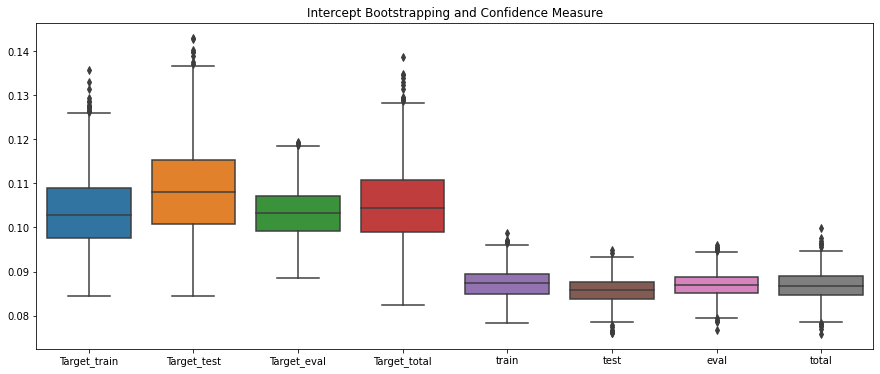

In [0]:
tmp = pd.DataFrame()
tmp['Target_train'] = mean_train
tmp['Target_test'] = mean_test
tmp['Target_eval'] = mean_eval
tmp['Target_total'] = mean_total
tmp['train'] = mean_train2
tmp['test'] = mean_test2
tmp['eval'] = mean_eval2
tmp['total'] = mean_total2

print('95% Confidence Target Train - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(mean_train,2.5), np.percentile(mean_train, 97.5), np.mean(mean_train), np.median(mean_train)))
print('95% Confidence Target Test - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(mean_test,2.5), np.percentile(mean_test, 97.5), np.mean(mean_test), np.median(mean_test)))
print('95% Confidence Target Eval - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(mean_eval,2.5), np.percentile(mean_eval, 97.5), np.mean(mean_eval), np.median(mean_eval)))
print('95% Confidence Target Total - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(mean_total,2.5), np.percentile(mean_total, 97.5), np.mean(mean_total), np.median(mean_total)))
print('95% Confidence Claim/Exposure Train - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(mean_train2,2.5), np.percentile(mean_train2, 97.5), np.mean(mean_train2), np.median(mean_train2)))
print('95% Confidence Claim/Exposure Test - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(mean_test2,2.5), np.percentile(mean_test2, 97.5), np.mean(mean_test2), np.median(mean_test2)))
print('95% Confidence Claim/Exposure Eval - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(mean_eval2,2.5), np.percentile(mean_eval2, 97.5), np.mean(mean_eval2), np.median(mean_eval2)))
print('95% Confidence Claim/Exposure Total - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(mean_total2,2.5), np.percentile(mean_total2, 97.5), np.mean(mean_total2), np.median(mean_total2)))

plt.figure(figsize = (15,6))
plt.title('Intercept Bootstrapping and Confidence Measure')
ax = sns.boxplot(data=tmp)

95% Confidence Claim/Exposure Train - 0.0809 - 0.0940, mean - 0.0873, median - 0.0873
95% Confidence Claim/Exposure Test - 0.0799 - 0.0912, mean - 0.0857, median - 0.0859
95% Confidence Claim/Exposure Eval - 0.0813 - 0.0928, mean - 0.0870, median - 0.0869
95% Confidence Claim/Exposure Total - 0.0809 - 0.0932, mean - 0.0869, median - 0.0868

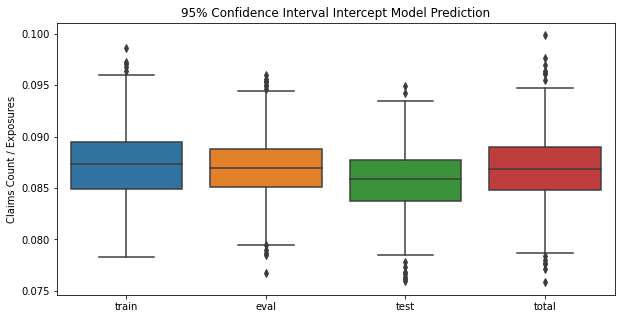

In [0]:
plt.figure(figsize = (10,5))
plt.title('95% Confidence Interval Intercept Model Prediction')
plt.ylabel('Claims Count / Exposures')
ax = sns.boxplot(data=tmp[['train','eval','test', 'total']])

print('95% Confidence Claim/Exposure Train - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(mean_train2,2.5), np.percentile(mean_train2, 97.5), np.mean(mean_train2), np.median(mean_train2)))
print('95% Confidence Claim/Exposure Test - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(mean_test2,2.5), np.percentile(mean_test2, 97.5), np.mean(mean_test2), np.median(mean_test2)))
print('95% Confidence Claim/Exposure Eval - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(mean_eval2,2.5), np.percentile(mean_eval2, 97.5), np.mean(mean_eval2), np.median(mean_eval2)))
print('95% Confidence Claim/Exposure Total - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(mean_total2,2.5), np.percentile(mean_total2, 97.5), np.mean(mean_total2), np.median(mean_total2)))


In [0]:
# params = { 'max_depth': [3,6],
#            'learning_rate': [0.01, 0.05, 0.1],
#            'n_estimators': [100, 200],
#            'colsample_bytree': [0.7,1],
#            'min_child_weight': [1],
#            'subsample': [0.8, 1]
#          }

params = { 'max_depth': [3],
           'learning_rate': [0.05],
           'n_estimators': [100],
           'colsample_bytree': [0.7],
           'min_child_weight': [1],
           'subsample': [0.8]
         }

xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   cv = 4,
                   scoring='neg_mean_squared_error')

clf.fit(gb_train, X_train['TARGET'])

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))


Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Lowest RMSE: 0.8874740963034047

Best number of trees = 215
Out[10]:

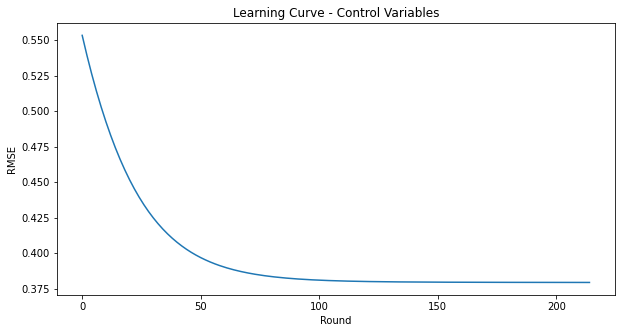

Text(0.5, 0, 'Round')

In [0]:
dots = X_train['DOT_NUMBER'].drop_duplicates()
train1 = X_train[X_train['DOT_NUMBER'].isin(dots[:2000])==False].index
test1 = X_train[X_train['DOT_NUMBER'].isin(dots[:2000])].index

train2 = X_train[X_train['DOT_NUMBER'].isin(dots[2000:6000])==False].index
test2 = X_train[X_train['DOT_NUMBER'].isin(dots[2000:6000])].index

train3 = X_train[X_train['DOT_NUMBER'].isin(dots[6000:])==False].index
test3 = X_train[X_train['DOT_NUMBER'].isin(dots[6000:])].index

tsFolds = [(train1, test1), (train2, test2), (train3, test3)]


# Cross-Validation score
params = { 'max_depth': 3,
           'learning_rate': 0.05,
           'colsample_bytree': 0.7,
           'min_child_weight': 1,
           'subsample': 0.8,
          'objective':'count:poisson',
         }


cv_results = xgb.cv(dtrain=dtrain, 
                    params=params, 
                    nfold = len(tsFolds),
                    folds = tsFolds,
                    num_boost_round=500,
                    early_stopping_rounds=10,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123)

print('Best number of trees = {}'.format(cv_results.shape[0]))

# Learning Curve
plt.figure(figsize = (10,5))
plt.title('Learning Curve - Control Variables')
plt.plot(cv_results.iloc[:,0])
plt.ylabel("RMSE")
plt.xlabel('Round')

In [0]:
params = { 'max_depth': 3,
           'learning_rate': 0.05,
           'colsample_bytree': 0.7,
           'min_child_weight': 1,
           'subsample': 0.8,
          'objective':'count:poisson',
         }


clf = xgb.train(
    params,
    dtrain,
    num_boost_round=10000,
    evals=[(deval, "eval")],
#     evals=[(dtrain, "train")],
    early_stopping_rounds=10,
    verbose_eval=False
)

Test Set Prediction - Fact outcome (3 groups)
<command-2151274611464085>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_train['pred_control'] = clf.predict(dtrain)
<command-2151274611464085>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_train['pred_control_grp'] = pd.qcut(X_train['pred_control'], 3)

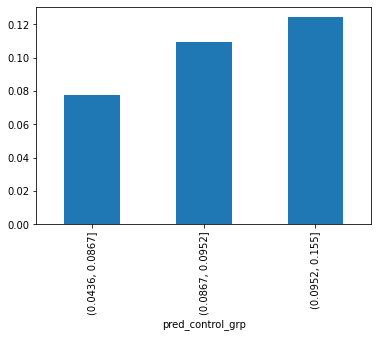

TARGET 
 size mean
pred_control_grp 
(0.0436, 0.0867] 32110.0 0.077278
(0.0867, 0.0952] 32048.0 0.109444
(0.0952, 0.155] 32048.0 0.124270
Test Set Prediction - Fact outcome (3 groups)
<command-2151274611464085>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_eval['pred_control'] = clf.predict(deval)
<command-2151274611464085>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_eval['pred_control_grp'] = pd.qcut(X_eval['pred_control'], 3)

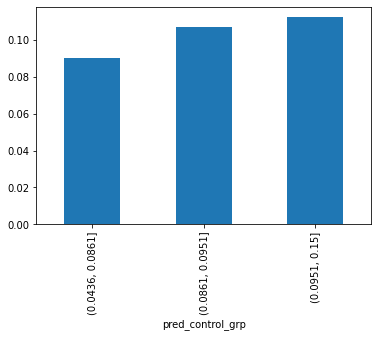

TARGET 
 size mean
pred_control_grp 
(0.0436, 0.0861] 11106.0 0.090425
(0.0861, 0.0951] 11293.0 0.106849
(0.0951, 0.15] 10860.0 0.112344
Test Set Prediction - Fact outcome (3 groups)
<command-2151274611464085>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_test['pred_control'] = clf.predict(dtest)
<command-2151274611464085>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_test['pred_control_grp'] = pd.qcut(X_test['pred_control'], 3)

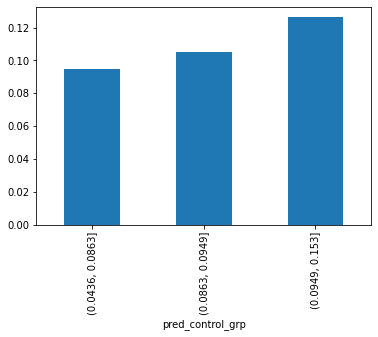

TARGET 
 size mean
pred_control_grp 
(0.0436, 0.0863] 11650.0 0.094662
(0.0863, 0.0949] 10299.0 0.104973
(0.0949, 0.153] 10955.0 0.126248

In [0]:
# Train Sample
print('Test Set Prediction - Fact outcome (3 groups)')
X_train['pred_control'] = clf.predict(dtrain)
X_train['pred_control_grp'] = pd.qcut(X_train['pred_control'], 3)
t = X_train.groupby('pred_control_grp').agg({'TARGET': [np.size, np.mean]})

t['TARGET']['mean'].plot(kind = 'bar')
plt.show()
print(t)

# Train Sample
print('Test Set Prediction - Fact outcome (3 groups)')
X_eval['pred_control'] = clf.predict(deval)
X_eval['pred_control_grp'] = pd.qcut(X_eval['pred_control'], 3)
t = X_eval.groupby('pred_control_grp').agg({'TARGET': [np.size, np.mean]})

t['TARGET']['mean'].plot(kind = 'bar')
plt.show()
print(t)


# Test Sample
print('Test Set Prediction - Fact outcome (3 groups)')
X_test['pred_control'] = clf.predict(dtest)
X_test['pred_control_grp'] = pd.qcut(X_test['pred_control'], 3)
t = X_test.groupby('pred_control_grp').agg({'TARGET': [np.size, np.mean]})

t['TARGET']['mean'].plot(kind = 'bar')
plt.show()
print(t)

Train Section================
95% Confidence Claim/Exposure Train-Lower - 0.0576 - 0.0773, mean - 0.0674, median - 0.0673
95% Confidence Claim/Exposure Train-Middle - 0.0793 - 0.1022, mean - 0.0901, median - 0.0899
95% Confidence Claim/Exposure Train-Upper - 0.0924 - 0.1168, mean - 0.1041, median - 0.1039
Eval Section ================
95% Confidence Claim/Exposure Eval-Lower - 0.0664 - 0.0836, mean - 0.0748, median - 0.0746
95% Confidence Claim/Exposure Eval-Middle - 0.0790 - 0.0981, mean - 0.0888, median - 0.0889
95% Confidence Claim/Exposure Eval-Upper - 0.0872 - 0.1082, mean - 0.0974, median - 0.0974
Test Section ==================
95% Confidence Claim/Exposure Test-Lower - 0.0645 - 0.0827, mean - 0.0735, median - 0.0734
95% Confidence Claim/Exposure Test-Middle - 0.0812 - 0.1014, mean - 0.0909, median - 0.0910
95% Confidence Claim/Exposure Test-Upper - 0.0828 - 0.1037, mean - 0.0932, median - 0.0930
Total Section ==================
95% Confidence Claim/Exposure Total-Lower - 0.0603 - 0.0809, mean - 0.0704, median - 0.0703
95% Confidence Claim/Exposure Total-Middle - 0.0781 - 0.1006, mean - 0.0894, median - 0.0893
95% Confidence Claim/Exposure Total-Upper - 0.0878 - 0.1137, mean - 0.1010, median - 0.1009

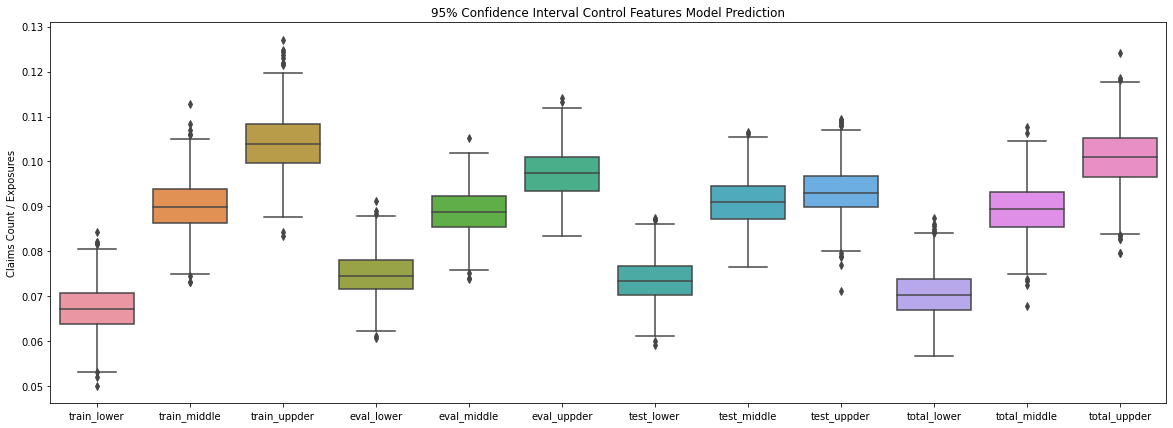

In [0]:
# Aggregate train + test + eval results
total = X_train.append(X_eval).append(X_test)
total.reset_index(drop = True, inplace = True)
total['pred_control_grp'] = pd.qcut(total['pred_control'], 3)
total

def boo_control(X_train, n):
  
  t = X_train.sample(n).groupby('pred_control_grp').agg({'TARGET': [np.size, np.mean],'CLAIM_COUNT_PAID': np.sum, 'EARNED_EXPOSURES': np.sum})
  t.columns = ['total','target','claims', 'exposures']
  t['claims_exposures'] = t['claims']/t['exposures']
  
  return t['claims_exposures']


n = 10000

train_lower = []
train_middle = []
train_upper = []

eval_lower = []
eval_middle = []
eval_upper = []

test_lower = []
test_middle = []
test_upper = []

total_lower = []
total_middle = []
total_upper = []

for i in range(1000):
  tmp = boo_control(X_train, n)
  train_lower.append(tmp[0])
  train_middle.append(tmp[1])
  train_upper.append(tmp[2])
  
  tmp = boo_control(X_eval, n)
  eval_lower.append(tmp[0])
  eval_middle.append(tmp[1])
  eval_upper.append(tmp[2])
  
  tmp = boo_control(X_test, n)
  test_lower.append(tmp[0])
  test_middle.append(tmp[1])
  test_upper.append(tmp[2])

  tmp = boo_control(total, n)
  total_lower.append(tmp[0])
  total_middle.append(tmp[1])
  total_upper.append(tmp[2])


tmp_control = pd.DataFrame()
tmp_control['train_lower'] = train_lower
tmp_control['train_middle'] = train_middle
tmp_control['train_uppder'] = train_upper

tmp_control['eval_lower'] = eval_lower
tmp_control['eval_middle'] = eval_middle
tmp_control['eval_uppder'] = eval_upper

tmp_control['test_lower'] = test_lower
tmp_control['test_middle'] = test_middle
tmp_control['test_uppder'] = test_upper

tmp_control['total_lower'] = total_lower
tmp_control['total_middle'] = total_middle
tmp_control['total_uppder'] = total_upper


plt.figure(figsize = (20,7))
plt.title('95% Confidence Interval Control Features Model Prediction')
plt.ylabel('Claims Count / Exposures')
ax = sns.boxplot(data=tmp_control)

print('Train Section================')
print('95% Confidence Claim/Exposure Train-Lower - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(train_lower,2.5), np.percentile(train_lower, 97.5), np.mean(train_lower), np.median(train_lower)))
print('95% Confidence Claim/Exposure Train-Middle - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(train_middle,2.5), np.percentile(train_middle, 97.5), np.mean(train_middle), np.median(train_middle)))
print('95% Confidence Claim/Exposure Train-Upper - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(train_upper,2.5), np.percentile(train_upper, 97.5), np.mean(train_upper), np.median(train_upper)))

print('Eval Section ================')
print('95% Confidence Claim/Exposure Eval-Lower - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(eval_lower,2.5), np.percentile(eval_lower, 97.5), np.mean(eval_lower), np.median(eval_lower)))
print('95% Confidence Claim/Exposure Eval-Middle - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(eval_middle,2.5), np.percentile(eval_middle, 97.5), np.mean(eval_middle), np.median(eval_middle)))
print('95% Confidence Claim/Exposure Eval-Upper - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(eval_upper,2.5), np.percentile(eval_upper, 97.5), np.mean(eval_upper), np.median(eval_upper)))

print('Test Section ==================')
print('95% Confidence Claim/Exposure Test-Lower - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(test_lower,2.5), np.percentile(test_lower, 97.5), np.mean(test_lower), np.median(test_lower)))
print('95% Confidence Claim/Exposure Test-Middle - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(test_middle,2.5), np.percentile(test_middle, 97.5), np.mean(test_middle), np.median(test_middle)))
print('95% Confidence Claim/Exposure Test-Upper - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(test_upper,2.5), np.percentile(test_upper, 97.5), np.mean(test_upper), np.median(test_upper)))

print('Total Section ==================')
print('95% Confidence Claim/Exposure Total-Lower - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(total_lower,2.5), np.percentile(total_lower, 97.5), np.mean(total_lower), np.median(total_lower)))
print('95% Confidence Claim/Exposure Total-Middle - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(total_middle,2.5), np.percentile(total_middle, 97.5), np.mean(total_middle), np.median(total_middle)))
print('95% Confidence Claim/Exposure Total-Upper - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(total_upper,2.5), np.percentile(total_upper, 97.5), np.mean(total_upper), np.median(total_upper)))


Out[15]:

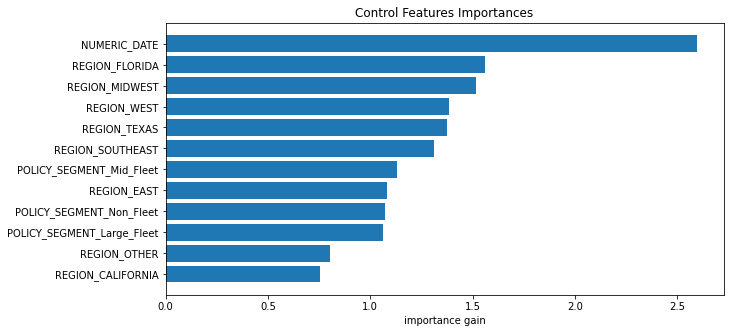

Text(0.5, 0, 'importance gain')

In [0]:

# Control deatures model importances
imp1 = pd.DataFrame()

imp1['values'] = clf.get_score(importance_type='gain').values()
imp1['names'] = clf.get_score(importance_type='gain').keys()
imp1.sort_values(by=['values'], inplace=True)
plt.figure(figsize = (10,5))
plt.title('Control Features Importances')
plt.barh(y = imp1['names'], width = imp1['values'])
plt.xlabel('importance gain')


In [0]:
# RATING PLAN VARIABLES:
rating_plan_variables = ['POLICYID', 'DOT_NUMBER', 'TARGET','CLAIM_COUNT_PAID', 'EARNED_EXPOSURES',
'POLICY_EFF_DT',
'POLICYSTATUS',
# Intercept Model
'YRSINBUSCT', 'VEHICLE_COUNT', 'MODEL_AGE',
# Control Variables ?number of days
'POLICY_YEAR', 'POLICY_MONTH', 'REGION', 'POLICY_SEGMENT', 'NUMERIC_DATE',
# Model Variables Rating Plan
'OPERATION_EXPOSURE_VEHICLE', 'VEHICLE_TYPE', 'PKGCOMBO', 'NEW_VENTURE', 'RADIUS_GROUP', 'EQUIPMENT_AGE']


variables = ['NUMERIC_DATE', 'REGION','POLICY_SEGMENT', 'OPERATION_EXPOSURE_VEHICLE', 'VEHICLE_TYPE', 'PKGCOMBO', 'NEW_VENTURE', 'RADIUS_GROUP', 'EQUIPMENT_AGE']

# # dummy variables
# gb_train = pd.get_dummies(X_train[variables], columns=['REGION','POLICY_SEGMENT','OPERATION_EXPOSURE_VEHICLE', 'VEHICLE_TYPE', 'PKGCOMBO', 'NEW_VENTURE', 'RADIUS_GROUP', 'EQUIPMENT_AGE'])
# all_dummies = list(gb_train.columns)

# gb_eval = pd.get_dummies(X_eval[variables], columns=['REGION','POLICY_SEGMENT','OPERATION_EXPOSURE_VEHICLE', 'VEHICLE_TYPE', 'PKGCOMBO', 'NEW_VENTURE', 'RADIUS_GROUP', 'EQUIPMENT_AGE'])
# gb_eval = gb_eval.reindex(columns = all_dummies, fill_value=0)

# gb_test = pd.get_dummies(X_test[variables], columns=['REGION','POLICY_SEGMENT','OPERATION_EXPOSURE_VEHICLE', 'VEHICLE_TYPE', 'PKGCOMBO', 'NEW_VENTURE', 'RADIUS_GROUP', 'EQUIPMENT_AGE'])
# gb_test = gb_test.reindex(columns = all_dummies, fill_value=0)


# NO dummy variables
gb_train = X_train[variables].copy()

gb_eval = X_eval[variables].copy()

gb_test = X_test[variables].copy()

for f in ['REGION','POLICY_SEGMENT','OPERATION_EXPOSURE_VEHICLE', 'VEHICLE_TYPE', 'PKGCOMBO', 'NEW_VENTURE', 'RADIUS_GROUP', 'EQUIPMENT_AGE']:
  gb_train[f] = gb_train[f].astype('category')
  gb_eval[f] = gb_eval[f].astype('category')
  gb_test[f] = gb_test[f].astype('category')


# creating XGB Data Martices with weights
dtrain = xgb.DMatrix(gb_train, label=X_train['TARGET'], weight = X_train['EARNED_EXPOSURES'], enable_categorical=True)
deval = xgb.DMatrix(gb_eval, label=X_eval['TARGET'], weight = X_eval['EARNED_EXPOSURES'], enable_categorical=True)
dtest = xgb.DMatrix(gb_test, label=X_test['TARGET'], weight = X_test['EARNED_EXPOSURES'], enable_categorical=True)
# doot = xgb.DMatrix(oot_test, label=OOT['TARGET'])



Best number of trees = 342
Out[19]:

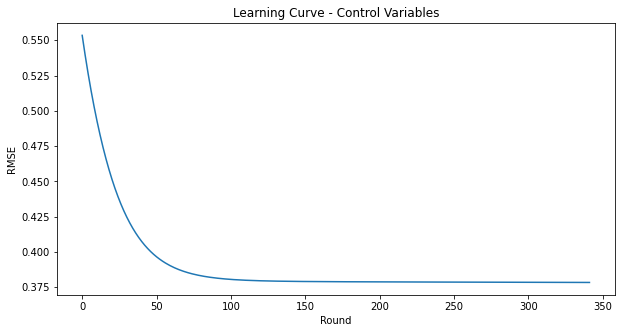

Text(0.5, 0, 'Round')

In [0]:
# # params = { 'max_depth': [3,6],
# #            'learning_rate': [0.01, 0.05, 0.1],
# #            'n_estimators': [100, 200],
# #            'colsample_bytree': [0.7,1],
# #            'min_child_weight': [1],
# #            'subsample': [0.8, 1]
# #          }

# params = { 'max_depth': [3],
#            'learning_rate': [0.05],
#            'n_estimators': [100],
#            'colsample_bytree': [0.7],
#            'min_child_weight': [1],
#            'subsample': [1]
#          }

# xgbr_rp = xgb.XGBRegressor(seed = 20)

# rp_clf = GridSearchCV(estimator=xgbr_rp, 
#                    param_grid=params,
#                    cv = 4,
#                    scoring='neg_mean_squared_error')

# rp_clf.fit(v_train, X_train['TARGET'])

# print("Best parameters:", rp_clf.best_params_)
# print("Lowest RMSE: ", (-rp_clf.best_score_)**(1/2.0))



# Cross-Validation score
params = { 'max_depth': 3,
           'learning_rate': 0.05,
           'colsample_bytree': 0.7,
           'min_child_weight': 1,
           'subsample': 0.8,
          'objective':'count:poisson',
         }


cv_results = xgb.cv(dtrain=dtrain, 
                    params=params, 
                    nfold = len(tsFolds),
                    folds = tsFolds,
                    num_boost_round=500,
                    early_stopping_rounds=10,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123)

print('Best number of trees = {}'.format(cv_results.shape[0]))

# Learning Curve
plt.figure(figsize = (10,5))
plt.title('Learning Curve - Control Variables')
plt.plot(cv_results.iloc[:,0])
plt.ylabel("RMSE")
plt.xlabel('Round')

In [0]:
params = { 'max_depth': 3,
           'learning_rate': 0.05,
           'colsample_bytree': 0.7,
           'min_child_weight': 1,
           'subsample': 0.8,
          'objective':'count:poisson',
         }


clf2 = xgb.train(
    params,
    dtrain,
    num_boost_round=10000,
    evals=[(deval, "eval")],
    early_stopping_rounds=10,
    verbose_eval=False
)

Test Set Prediction - Fact outcome (3 groups)
<command-2151274611464189>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_train['pred_rating'] = clf2.predict(dtrain)
<command-2151274611464189>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_train['pred_rating_grp'] = pd.qcut(X_train['pred_rating'], 3)

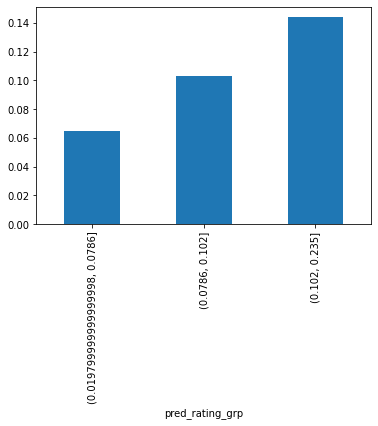

TARGET 
 size mean
pred_rating_grp 
(0.019799999999999998, 0.0786] 32202.0 0.064419
(0.0786, 0.102] 31953.0 0.102760
(0.102, 0.235] 32051.0 0.143945
Test Set Prediction - Fact outcome (3 groups)
<command-2151274611464189>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_eval['pred_rating'] = clf2.predict(deval)
<command-2151274611464189>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_eval['pred_rating_grp'] = pd.qcut(X_eval['pred_rating'], 3)

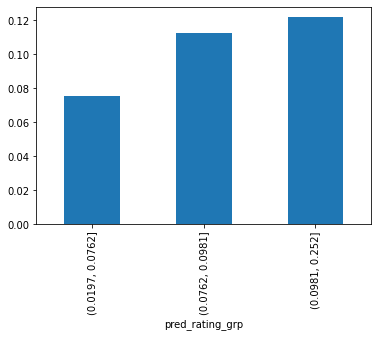

TARGET 
 size mean
pred_rating_grp 
(0.0197, 0.0762] 11092.0 0.075194
(0.0762, 0.0981] 11081.0 0.112350
(0.0981, 0.252] 11086.0 0.121952
Test Set Prediction - Fact outcome (3 groups)
<command-2151274611464189>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_test['pred_rating'] = clf2.predict(dtest)
<command-2151274611464189>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_test['pred_rating_grp'] = pd.qcut(X_test['pred_rating'], 3)

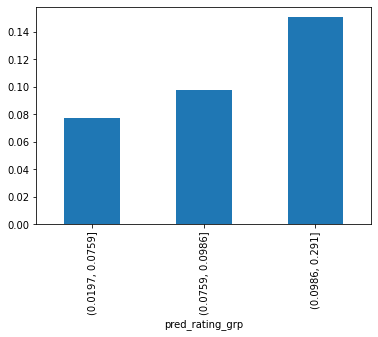

TARGET 
 size mean
pred_rating_grp 
(0.0197, 0.0759] 10975.0 0.077259
(0.0759, 0.0986] 10962.0 0.097457
(0.0986, 0.291] 10967.0 0.150519

In [0]:
# Train Sample
print('Test Set Prediction - Fact outcome (3 groups)')
X_train['pred_rating'] = clf2.predict(dtrain)
X_train['pred_rating_grp'] = pd.qcut(X_train['pred_rating'], 3)
t = X_train.groupby('pred_rating_grp').agg({'TARGET': [np.size, np.mean]})

t['TARGET']['mean'].plot(kind = 'bar')
plt.show()
print(t)

# Train Sample
print('Test Set Prediction - Fact outcome (3 groups)')
X_eval['pred_rating'] = clf2.predict(deval)
X_eval['pred_rating_grp'] = pd.qcut(X_eval['pred_rating'], 3)
t = X_eval.groupby('pred_rating_grp').agg({'TARGET': [np.size, np.mean]})

t['TARGET']['mean'].plot(kind = 'bar')
plt.show()
print(t)


# Test Sample
print('Test Set Prediction - Fact outcome (3 groups)')
X_test['pred_rating'] = clf2.predict(dtest)
X_test['pred_rating_grp'] = pd.qcut(X_test['pred_rating'], 3)
t = X_test.groupby('pred_rating_grp').agg({'TARGET': [np.size, np.mean]})

t['TARGET']['mean'].plot(kind = 'bar')
plt.show()
print(t)

In [0]:
# Aggregate train + test + eval results
total = X_train.append(X_eval).append(X_test)
total.reset_index(drop = True, inplace = True)
total['pred_rating_grp'] = pd.qcut(total['pred_rating'], 3)
total['pred_control_grp'] = pd.qcut(total['pred_control'], 3)

total

Out[22]:

,POLICYID,DOT_NUMBER,TARGET,CLAIM_COUNT_PAID,EARNED_EXPOSURES,POLICY_EFF_DT,POLICYSTATUS,POLICYISSUETYPE,VEHICLE_NO,YRSINBUSCT,VEHICLE_COUNT,MODEL_AGE,POLICY_YEAR,POLICY_MONTH,REGION,POLICY_SEGMENT,NUMERIC_DATE,OPERATION_EXPOSURE_VEHICLE,VEHICLE_TYPE,PKGCOMBO,NEW_VENTURE,RADIUS_GROUP,EQUIPMENT_AGE,is_train,is_eval,pred_control,pred_control_grp,pred_rating,pred_rating_grp
0,CAI0038074,831876,0.0,0,0.005479,2015-02-24,Renewed,Renewal,4,19.0,8.0,9.0,2015,2,TEXAS,Non_Fleet,82,OTHER,Extra Heavy Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,3RD YR NEW VENTURE,LOCAL,6-15,1,NaN,0.102509,"(0.0951, 0.155]",0.080894,"(0.0775, 0.1]"
1,CAI0057005,1863733,0.0,0,0.347945,2018-07-01,Renewed,Renewal,4,16.0,5.0,14.0,2018,7,EAST,Non_Fleet,42,OTHER,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,6-15,1,NaN,0.094841,"(0.0863, 0.0951]",0.070842,"(0.0197, 0.0775]"
2,CAI0060872,2730613,0.0,0,0.972603,2015-01-31,Renewed,New,3,NaN,2.0,5.0,2015,1,CALIFORNIA,Non_Fleet,83,OTHER,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,0-5,1,NaN,0.092249,"(0.0863, 0.0951]",0.079301,"(0.0775, 0.1]"
3,CAO0220579,2427068,0.0,0,1.000000,2015-01-01,Did Not Renew,Renewal,13,3.0,NaN,9.0,2015,1,TEXAS,Mid_Fleet,84,DUMPING,Extra Heavy Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,6-15,1,NaN,0.081359,"(0.0436, 0.0863]",0.071499,"(0.0197, 0.0775]"
4,CAO0253809,1960567,0.0,0,1.000000,2016-04-10,Did Not Renew,Renewal,6,10.0,6.0,4.0,2016,4,TEXAS,Non_Fleet,68,OTHER,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,0-5,1,NaN,0.102018,"(0.0951, 0.155]",0.075876,"(0.0197, 0.0775]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162364,RSO0003677,2157326,0.0,0,0.482192,2019-05-16,Did Not Renew,Renewal,9,10.0,5.0,17.0,2019,5,EAST,Non_Fleet,31,LIVESTOCK,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,Over 16,0,0.0,0.076397,"(0.0436, 0.0863]",0.057240,"(0.0197, 0.0775]"
162365,RSO0004401,3014097,0.0,0,1.000000,2020-06-01,Renewed,Renewal,1,3.0,3.0,21.0,2020,6,EAST,Non_Fleet,19,LOGGING,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,Over 16,0,0.0,0.071322,"(0.0436, 0.0863]",0.053693,"(0.0197, 0.0775]"
162366,RSS0000341,2013460,0.0,0,1.000000,2018-05-08,Renewed,Renewal,4,13.0,7.0,4.0,2018,5,CALIFORNIA,Non_Fleet,43,DUMPING,Extra Heavy Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,0-5,0,0.0,0.098002,"(0.0951, 0.155]",0.093037,"(0.0775, 0.1]"
162367,RSS0000430,1930113,0.0,0,1.000000,2018-05-26,Did Not Renew,Renewal,1,17.0,4.0,7.0,2018,5,CALIFORNIA,Non_Fleet,43,TRUCKERS,Heavy Commercial Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,INTERMEDIATE,6-15,0,0.0,0.098002,"(0.0951, 0.155]",0.097191,"(0.0775, 0.1]"


In [0]:
tmp = boo_control(total, n)

Train Section================
95% Confidence Claim/Exposure Train-Lower - 0.0453 - 0.0634, mean - 0.0545, median - 0.0545
95% Confidence Claim/Exposure Train-Middle - 0.0782 - 0.1005, mean - 0.0889, median - 0.0888
95% Confidence Claim/Exposure Train-Upper - 0.1063 - 0.1332, mean - 0.1201, median - 0.1202
Eval Section ================
95% Confidence Claim/Exposure Eval-Lower - 0.0524 - 0.0683, mean - 0.0603, median - 0.0602
95% Confidence Claim/Exposure Eval-Middle - 0.0846 - 0.1046, mean - 0.0949, median - 0.0950
95% Confidence Claim/Exposure Eval-Upper - 0.0966 - 0.1180, mean - 0.1073, median - 0.1072
Test Section ==================
95% Confidence Claim/Exposure Test-Lower - 0.0480 - 0.0642, mean - 0.0559, median - 0.0558
95% Confidence Claim/Exposure Test-Middle - 0.0783 - 0.0975, mean - 0.0872, median - 0.0871
95% Confidence Claim/Exposure Test-Upper - 0.1030 - 0.1263, mean - 0.1152, median - 0.1152
Total Section ==================
95% Confidence Claim/Exposure Total-Lower - 0.0473 - 0.0652, mean - 0.0558, median - 0.0557
95% Confidence Claim/Exposure Total-Middle - 0.0786 - 0.1020, mean - 0.0898, median - 0.0898
95% Confidence Claim/Exposure Total-Upper - 0.1029 - 0.1306, mean - 0.1164, median - 0.1162

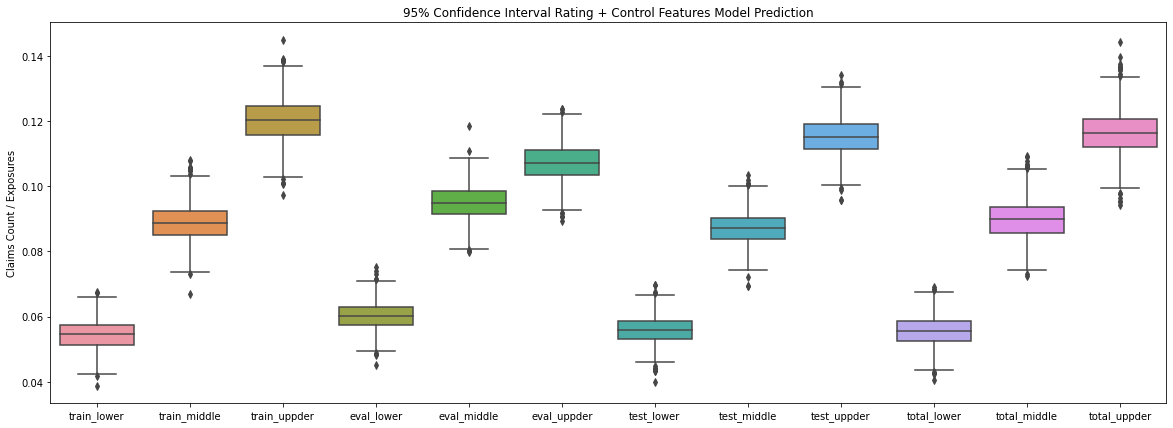

In [0]:

def boo_rating(X_train, n):
  
  t = X_train.sample(n).groupby('pred_rating_grp').agg({'TARGET': [np.size, np.mean],'CLAIM_COUNT_PAID': np.sum, 'EARNED_EXPOSURES': np.sum})
  t.columns = ['total','target','claims', 'exposures']
  t['claims_exposures'] = t['claims']/t['exposures']
  
  return t['claims_exposures']


n = 10000

train_lower = []
train_middle = []
train_upper = []

eval_lower = []
eval_middle = []
eval_upper = []

test_lower = []
test_middle = []
test_upper = []

total_lower = []
total_middle = []
total_upper = []


for i in range(1000):
  tmp = boo_rating(X_train, n)
  train_lower.append(tmp[0])
  train_middle.append(tmp[1])
  train_upper.append(tmp[2])
  
  tmp = boo_rating(X_eval, n)
  eval_lower.append(tmp[0])
  eval_middle.append(tmp[1])
  eval_upper.append(tmp[2])
  
  tmp = boo_rating(X_test, n)
  test_lower.append(tmp[0])
  test_middle.append(tmp[1])
  test_upper.append(tmp[2])
  
  tmp = boo_rating(total, n)
  total_lower.append(tmp[0])
  total_middle.append(tmp[1])
  total_upper.append(tmp[2])

  
tmp_rating = pd.DataFrame()
tmp_rating['train_lower'] = train_lower
tmp_rating['train_middle'] = train_middle
tmp_rating['train_uppder'] = train_upper

tmp_rating['eval_lower'] = eval_lower
tmp_rating['eval_middle'] = eval_middle
tmp_rating['eval_uppder'] = eval_upper

tmp_rating['test_lower'] = test_lower
tmp_rating['test_middle'] = test_middle
tmp_rating['test_uppder'] = test_upper

tmp_rating['total_lower'] = total_lower
tmp_rating['total_middle'] = total_middle
tmp_rating['total_uppder'] = total_upper


plt.figure(figsize = (20,7))
plt.title('95% Confidence Interval Rating + Control Features Model Prediction')
plt.ylabel('Claims Count / Exposures')
ax = sns.boxplot(data=tmp_rating)


print('Train Section================')
print('95% Confidence Claim/Exposure Train-Lower - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(train_lower,2.5), np.percentile(train_lower, 97.5), np.mean(train_lower), np.median(train_lower)))
print('95% Confidence Claim/Exposure Train-Middle - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(train_middle,2.5), np.percentile(train_middle, 97.5), np.mean(train_middle), np.median(train_middle)))
print('95% Confidence Claim/Exposure Train-Upper - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(train_upper,2.5), np.percentile(train_upper, 97.5), np.mean(train_upper), np.median(train_upper)))

print('Eval Section ================')
print('95% Confidence Claim/Exposure Eval-Lower - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(eval_lower,2.5), np.percentile(eval_lower, 97.5), np.mean(eval_lower), np.median(eval_lower)))
print('95% Confidence Claim/Exposure Eval-Middle - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(eval_middle,2.5), np.percentile(eval_middle, 97.5), np.mean(eval_middle), np.median(eval_middle)))
print('95% Confidence Claim/Exposure Eval-Upper - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(eval_upper,2.5), np.percentile(eval_upper, 97.5), np.mean(eval_upper), np.median(eval_upper)))

print('Test Section ==================')
print('95% Confidence Claim/Exposure Test-Lower - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(test_lower,2.5), np.percentile(test_lower, 97.5), np.mean(test_lower), np.median(test_lower)))
print('95% Confidence Claim/Exposure Test-Middle - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(test_middle,2.5), np.percentile(test_middle, 97.5), np.mean(test_middle), np.median(test_middle)))
print('95% Confidence Claim/Exposure Test-Upper - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(test_upper,2.5), np.percentile(test_upper, 97.5), np.mean(test_upper), np.median(test_upper)))

print('Total Section ==================')
print('95% Confidence Claim/Exposure Total-Lower - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(total_lower,2.5), np.percentile(total_lower, 97.5), np.mean(total_lower), np.median(total_lower)))
print('95% Confidence Claim/Exposure Total-Middle - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(total_middle,2.5), np.percentile(total_middle, 97.5), np.mean(total_middle), np.median(total_middle)))
print('95% Confidence Claim/Exposure Total-Upper - {:0.4f} - {:0.4f}, mean - {:0.4f}, median - {:0.4f}'.format(np.percentile(total_upper,2.5), np.percentile(total_upper, 97.5), np.mean(total_upper), np.median(total_upper)))


Out[24]:

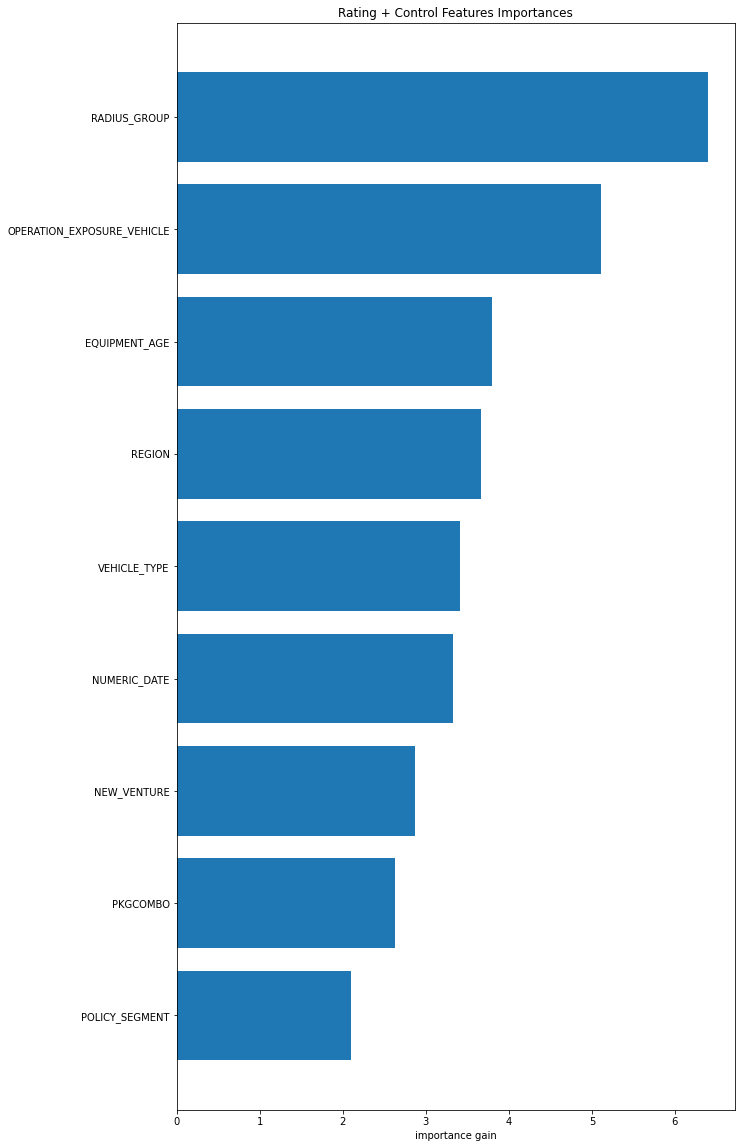

Text(0.5, 0, 'importance gain')

In [0]:

# Control deatures model importances
imp1 = pd.DataFrame()

imp1['values'] = clf2.get_score(importance_type='gain').values()
imp1['names'] = clf2.get_score(importance_type='gain').keys()
imp1.sort_values(by=['values'], inplace=True)
plt.figure(figsize = (10,20))
plt.title('Rating + Control Features Importances')
plt.barh(y = imp1['names'], width = imp1['values'])
plt.xlabel('importance gain')


In [0]:
# saving model to pickle object
import pickle

file_name = "/dbfs/FileStore/shared_uploads/onyshi1@nationwide.com/xgb_rating_plan_category.pkl"

# save
pickle.dump(clf2, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

# test
xgb_model_loaded.predict(dtest)[0] == clf2.predict(dtest)[0]




Out[25]: True

In [0]:
total = X_train.append(X_eval, ignore_index=True).append(X_test, ignore_index =  True)
total.to_csv('/dbfs/FileStore/shared_uploads/onyshi1@nationwide.com/xgb_rating_plan_total_data2_cat.csv')

In [0]:
total[total.columns[total.columns.isin(['pred_control_grp','pred_rating_grp'])==False]]


Out[35]:

,POLICYID,DOT_NUMBER,TARGET,CLAIM_COUNT_PAID,EARNED_EXPOSURES,POLICY_EFF_DT,POLICYSTATUS,POLICYISSUETYPE,VEHICLE_NO,YRSINBUSCT,VEHICLE_COUNT,MODEL_AGE,POLICY_YEAR,POLICY_MONTH,REGION,POLICY_SEGMENT,NUMERIC_DATE,OPERATION_EXPOSURE_VEHICLE,VEHICLE_TYPE,PKGCOMBO,NEW_VENTURE,RADIUS_GROUP,EQUIPMENT_AGE,is_train,is_eval,pred_control,pred_rating
0,CAI0038074,831876,0.0,0,0.005479,2015-02-24,Renewed,Renewal,4,19.0,8.0,9.0,2015,2,TEXAS,Non_Fleet,82,OTHER,Extra Heavy Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,3RD YR NEW VENTURE,LOCAL,6-15,1,NaN,0.102509,0.080894
1,CAI0057005,1863733,0.0,0,0.347945,2018-07-01,Renewed,Renewal,4,16.0,5.0,14.0,2018,7,EAST,Non_Fleet,42,OTHER,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,6-15,1,NaN,0.094841,0.070842
2,CAI0060872,2730613,0.0,0,0.972603,2015-01-31,Renewed,New,3,NaN,2.0,5.0,2015,1,CALIFORNIA,Non_Fleet,83,OTHER,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,0-5,1,NaN,0.092249,0.079301
3,CAO0220579,2427068,0.0,0,1.000000,2015-01-01,Did Not Renew,Renewal,13,3.0,NaN,9.0,2015,1,TEXAS,Mid_Fleet,84,DUMPING,Extra Heavy Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,6-15,1,NaN,0.081359,0.071499
4,CAO0253809,1960567,0.0,0,1.000000,2016-04-10,Did Not Renew,Renewal,6,10.0,6.0,4.0,2016,4,TEXAS,Non_Fleet,68,OTHER,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,0-5,1,NaN,0.102018,0.075876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162364,RSO0003677,2157326,0.0,0,0.482192,2019-05-16,Did Not Renew,Renewal,9,10.0,5.0,17.0,2019,5,EAST,Non_Fleet,31,LIVESTOCK,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,Over 16,0,0.0,0.076397,0.057240
162365,RSO0004401,3014097,0.0,0,1.000000,2020-06-01,Renewed,Renewal,1,3.0,3.0,21.0,2020,6,EAST,Non_Fleet,19,LOGGING,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,Over 16,0,0.0,0.071322,0.053693
162366,RSS0000341,2013460,0.0,0,1.000000,2018-05-08,Renewed,Renewal,4,13.0,7.0,4.0,2018,5,CALIFORNIA,Non_Fleet,43,DUMPING,Extra Heavy Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,0-5,0,0.0,0.098002,0.093037
162367,RSS0000430,1930113,0.0,0,1.000000,2018-05-26,Did Not Renew,Renewal,1,17.0,4.0,7.0,2018,5,CALIFORNIA,Non_Fleet,43,TRUCKERS,Heavy Commercial Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,INTERMEDIATE,6-15,0,0.0,0.098002,0.097191


In [0]:

# Jason lines
df_spark = spark.createDataFrame(total[total.columns[total.columns.isin(['pred_control_grp','pred_rating_grp'])==False]])
df_spark.write.mode('overwrite').saveAsTable('es.xgb_rating_plan_total_data2_cat') #ess_rubix.rubix5_clusters es.rubix5_clusters
print('saved2')

saved2

In [0]:
df_spark = spark.read.table('es.xgb_rating_plan_total_data2')
df_spark.toPandas()


Out[6]:

,POLICYID,DOT_NUMBER,TARGET,CLAIM_COUNT_PAID,EARNED_EXPOSURES,POLICY_EFF_DT,POLICYSTATUS,POLICYISSUETYPE,VEHICLE_NO,YRSINBUSCT,VEHICLE_COUNT,MODEL_AGE,POLICY_YEAR,POLICY_MONTH,REGION,POLICY_SEGMENT,NUMERIC_DATE,OPERATION_EXPOSURE_VEHICLE,VEHICLE_TYPE,PKGCOMBO,NEW_VENTURE,RADIUS_GROUP,EQUIPMENT_AGE,is_train,is_eval,pred_control,pred_rating
0,LTI0005177,1571025,0.0,0,1.000000,2016-05-20,Renewed,Renewal,1,11.0,1.0,10.0,2016,5,TEXAS,Non_Fleet,67,TRUCKERS,Extra-heavy Truck-tractors Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LONG,6-15,1,NaN,0.102018,0.111150
1,LTI0005217,2294111,0.0,0,1.000000,2017-12-01,Renewed,Renewal,5,14.0,15.0,13.0,2017,12,TEXAS,Non_Fleet,49,TRUCKERS,Extra-heavy Truck-tractors Zone Truckers,"AUTO LIAB/PD,GL & MTR TRK CARGO",OTHER,LONG,6-15,1,NaN,0.109908,0.113560
2,LTI0005371,1805063,0.0,0,0.093151,2016-07-23,Did Not Renew,Renewal,3,2.0,3.0,6.0,2016,7,TEXAS,Non_Fleet,65,TRUCKERS,Extra-heavy Truck-tractors Zone Truckers,AUTO LIAB/PD & MOTOR TRK CARGO,3RD YR NEW VENTURE,LONG,0-5,1,NaN,0.102431,0.126128
3,LTI0005651,1818503,0.0,0,1.002740,2015-12-23,Renewed,Renewal,3,8.0,4.0,29.0,2015,12,CALIFORNIA,Non_Fleet,72,DUMPING,Extra Heavy Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,Over 16,1,NaN,0.098026,0.083762
4,LTI0005700,2088446,0.0,0,0.928767,2016-01-19,Did Not Renew,New,9,14.0,10.0,1.0,2016,1,CALIFORNIA,Non_Fleet,71,TRUCKERS,Extra-heavy Truck-tractors Zone Truckers,AUTO LIABILITY ONLY,OTHER,LONG,0-5,1,NaN,0.097637,0.126915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162364,RSO0003677,2157326,0.0,0,0.482192,2019-05-16,Did Not Renew,Renewal,9,10.0,5.0,17.0,2019,5,EAST,Non_Fleet,31,LIVESTOCK,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,Over 16,0,0.0,0.076397,0.055988
162365,RSO0004401,3014097,0.0,0,1.000000,2020-06-01,Renewed,Renewal,1,3.0,3.0,21.0,2020,6,EAST,Non_Fleet,19,LOGGING,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,Over 16,0,0.0,0.071322,0.046303
162366,RSS0000341,2013460,0.0,0,1.000000,2018-05-08,Renewed,Renewal,4,13.0,7.0,4.0,2018,5,CALIFORNIA,Non_Fleet,43,DUMPING,Extra Heavy Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,0-5,0,0.0,0.098002,0.100661
162367,RSS0000430,1930113,0.0,0,1.000000,2018-05-26,Did Not Renew,Renewal,1,17.0,4.0,7.0,2018,5,CALIFORNIA,Non_Fleet,43,TRUCKERS,Heavy Commercial Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,INTERMEDIATE,6-15,0,0.0,0.098002,0.092773


In [0]:
df = pd.read_csv('/dbfs/FileStore/shared_uploads/onyshi1@nationwide.com/xgb_rating_plan_total_data2.csv')
del df['Unnamed: 0']
df['pred_claim_rating'] = df['pred_rating'] * df['EARNED_EXPOSURES']
df['pred_claim_control'] = df['pred_control'] * df['EARNED_EXPOSURES']

df = df.rename(columns={'pred_rating': 'pred_frequency_rating', 'pred_control': 'pred_frequency_control'})
df

Out[38]:

,POLICYID,DOT_NUMBER,TARGET,CLAIM_COUNT_PAID,EARNED_EXPOSURES,POLICY_EFF_DT,POLICYSTATUS,POLICYISSUETYPE,VEHICLE_NO,YRSINBUSCT,VEHICLE_COUNT,MODEL_AGE,POLICY_YEAR,POLICY_MONTH,REGION,POLICY_SEGMENT,NUMERIC_DATE,OPERATION_EXPOSURE_VEHICLE,VEHICLE_TYPE,PKGCOMBO,NEW_VENTURE,RADIUS_GROUP,EQUIPMENT_AGE,is_train,is_eval,pred_frequency_control,pred_control_grp,pred_frequency_rating,pred_rating_grp,pred_claim_rating,pred_claim_control
0,CAI0038074,831876,0.0,0,0.005479,2015-02-24,Renewed,Renewal,4,19.0,8.0,9.0,2015,2,TEXAS,Non_Fleet,82,OTHER,Extra Heavy Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,3RD YR NEW VENTURE,LOCAL,6-15,1,NaN,0.102509,"(0.0952, 0.155]",0.073861,"(0.03, 0.0784]",0.000405,0.000562
1,CAI0057005,1863733,0.0,0,0.347945,2018-07-01,Renewed,Renewal,4,16.0,5.0,14.0,2018,7,EAST,Non_Fleet,42,OTHER,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,6-15,1,NaN,0.094841,"(0.0867, 0.0952]",0.062779,"(0.03, 0.0784]",0.021844,0.033000
2,CAI0060872,2730613,0.0,0,0.972603,2015-01-31,Renewed,New,3,NaN,2.0,5.0,2015,1,CALIFORNIA,Non_Fleet,83,OTHER,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,0-5,1,NaN,0.092249,"(0.0867, 0.0952]",0.072673,"(0.03, 0.0784]",0.070682,0.089722
3,CAO0220579,2427068,0.0,0,1.000000,2015-01-01,Did Not Renew,Renewal,13,3.0,NaN,9.0,2015,1,TEXAS,Mid_Fleet,84,DUMPING,Extra Heavy Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,6-15,1,NaN,0.081359,"(0.0436, 0.0867]",0.085440,"(0.0784, 0.101]",0.085440,0.081359
4,CAO0253809,1960567,0.0,0,1.000000,2016-04-10,Did Not Renew,Renewal,6,10.0,6.0,4.0,2016,4,TEXAS,Non_Fleet,68,OTHER,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,0-5,1,NaN,0.102018,"(0.0952, 0.155]",0.072278,"(0.03, 0.0784]",0.072278,0.102018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162364,RSO0003677,2157326,0.0,0,0.482192,2019-05-16,Did Not Renew,Renewal,9,10.0,5.0,17.0,2019,5,EAST,Non_Fleet,31,LIVESTOCK,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,Over 16,0,0.0,0.076397,"(0.0436, 0.0863]",0.055988,"(0.0335, 0.0769]",0.026997,0.036838
162365,RSO0004401,3014097,0.0,0,1.000000,2020-06-01,Renewed,Renewal,1,3.0,3.0,21.0,2020,6,EAST,Non_Fleet,19,LOGGING,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,Over 16,0,0.0,0.071322,"(0.0436, 0.0863]",0.046303,"(0.0335, 0.0769]",0.046303,0.071322
162366,RSS0000341,2013460,0.0,0,1.000000,2018-05-08,Renewed,Renewal,4,13.0,7.0,4.0,2018,5,CALIFORNIA,Non_Fleet,43,DUMPING,Extra Heavy Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,0-5,0,0.0,0.098002,"(0.0949, 0.153]",0.100661,"(0.1, 0.158]",0.100661,0.098002
162367,RSS0000430,1930113,0.0,0,1.000000,2018-05-26,Did Not Renew,Renewal,1,17.0,4.0,7.0,2018,5,CALIFORNIA,Non_Fleet,43,TRUCKERS,Heavy Commercial Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,INTERMEDIATE,6-15,0,0.0,0.098002,"(0.0949, 0.153]",0.092773,"(0.0769, 0.1]",0.092773,0.098002


In [0]:

# Jason lines
df_spark = spark.createDataFrame(df)
df_spark.write.mode('overwrite').saveAsTable('es.xgb_rating_plan_total_data3') #ess_rubix.rubix5_clusters es.rubix5_clusters
print('saved2')

saved2

In [0]:
tmp = df[(df['is_train']==0)&(df['is_eval']==0)].groupby(['POLICY_YEAR','POLICY_MONTH']).agg({'POLICYID': np.size, 'EARNED_EXPOSURES': np.sum, 'CLAIM_COUNT_PAID': np.sum, 'pred_claim': np.sum, 'pred_rating': np.sum})

tmp['FACT_FREQUENCY'] = tmp['CLAIM_COUNT_PAID'] / tmp['EARNED_EXPOSURES']
tmp['PRED_FREQUENCY'] = tmp['pred_claim'] / tmp['EARNED_EXPOSURES']
tmp['OLD_PRED_FREQUENCY'] = tmp['pred_rating'] / tmp['EARNED_EXPOSURES']
tmp


Out[24]:

POLICYID 
 EARNED_EXPOSURES 
 CLAIM_COUNT_PAID 
 pred_claim 
 pred_rating 
 FACT_FREQUENCY 
 PRED_FREQUENCY 
 OLD_PRED_FREQUENCY 
 
 
 POLICY_YEAR 
 POLICY_MONTH 
 
 
 
 
 
 
 
 
 
 
 
 
 2015 
 1 
 528 
 433.157044 
 47 
 39.287033 
 48.128395 
 0.108506 
 0.090699 
 0.111111 
 
 
 2 
 546 
 432.081826 
 35 
 39.850796 
 50.802141 
 0.081003 
 0.092230 
 0.117575 
 
 
 3 
 830 
 651.744103 
 61 
 59.236676 
 76.341191 
 0.093595 
 0.090889 
 0.117134 
 
 
 4 
 666 
 536.884058 
 50 
 48.171711 
 60.451936 
 0.093130 
 0.089725 
 0.112598 
 
 
 5 
 631 
 480.072885 
 31 
 45.640632 
 61.005361 
 0.064574 
 0.095070 
 0.127075 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 2020 
 8 
 675 
 453.913473 
 35 
 30.238684 
 45.248623 
 0.077107 
 0.066618 
 0.099686 
 
 
 9 
 319 
 238.956164 
 9 
 16.590279 
 22.418403 
 0.037664 
 0.069428 
 0.093818 
 
 
 10 
 363 
 259.969863 
 9 
 17.190442 
 24.344360 
 0.034619 
 0.066125 
 0.093643 
 
 
 11 
 232 
 173.254016 
 13 
 12.242370 
 16.381110 
 0.075034 
 0.070661 
 0.094550 
 
 
 12 
 252 
 195.536986 
 13 
 14.960148 
 19.269055 
 0.066484 
 0.076508 
 0.098544 
 
 
 
 72 rows × 8 columns

Out[16]:

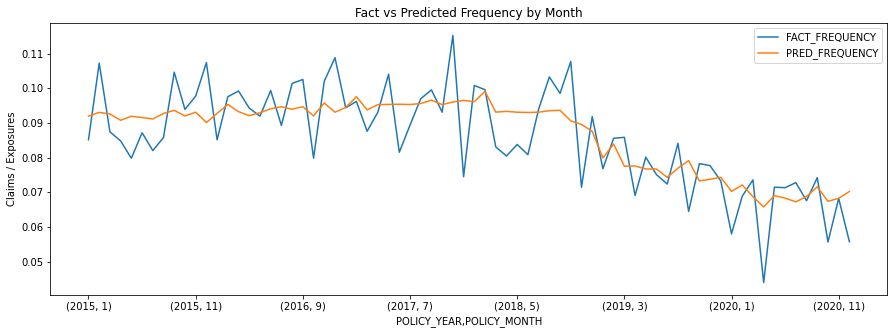

Text(0, 0.5, 'Claims / Exposures')

In [0]:
# total Data (TRAIN + EVAL + TEST)
tmp[['FACT_FREQUENCY','PRED_FREQUENCY']].plot(figsize=(15,5))
plt.title('Fact vs Predicted Frequency by Month')
plt.ylabel('Claims / Exposures')


Out[71]:

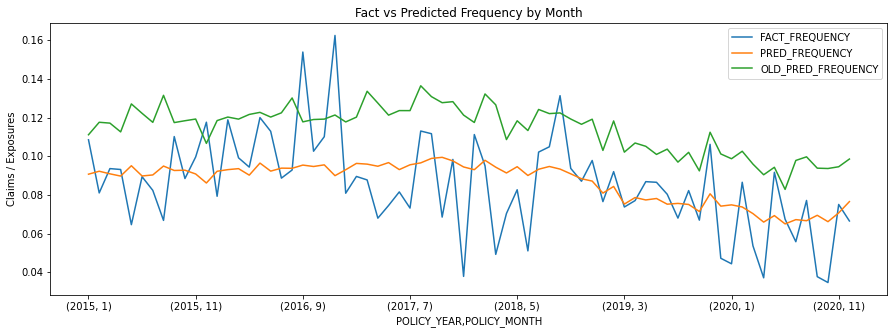

Text(0, 0.5, 'Claims / Exposures')

In [0]:
# TEST ONLY Data
tmp[['FACT_FREQUENCY','PRED_FREQUENCY','OLD_PRED_FREQUENCY']].plot(figsize=(15,5))
plt.title('Fact vs Predicted Frequency by Month')
plt.ylabel('Claims / Exposures')


In [0]:
df

Out[72]:

,POLICYID,DOT_NUMBER,TARGET,CLAIM_COUNT_PAID,EARNED_EXPOSURES,POLICY_EFF_DT,POLICYSTATUS,POLICYISSUETYPE,VEHICLE_NO,YRSINBUSCT,VEHICLE_COUNT,MODEL_AGE,POLICY_YEAR,POLICY_MONTH,REGION,POLICY_SEGMENT,NUMERIC_DATE,OPERATION_EXPOSURE_VEHICLE,VEHICLE_TYPE,PKGCOMBO,NEW_VENTURE,RADIUS_GROUP,EQUIPMENT_AGE,is_train,is_eval,pred_frequency_control,pred_frequency_rating,pred_claim_rating,pred_claim_control
0,LTI0005177,1571025,0.0,0,1.000000,2016-05-20,Renewed,Renewal,1,11.0,1.0,10.0,2016,5,TEXAS,Non_Fleet,67,TRUCKERS,Extra-heavy Truck-tractors Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LONG,6-15,1,NaN,0.102018,0.111150,0.111150,0.102018
1,LTI0005217,2294111,0.0,0,1.000000,2017-12-01,Renewed,Renewal,5,14.0,15.0,13.0,2017,12,TEXAS,Non_Fleet,49,TRUCKERS,Extra-heavy Truck-tractors Zone Truckers,"AUTO LIAB/PD,GL & MTR TRK CARGO",OTHER,LONG,6-15,1,NaN,0.109908,0.113560,0.113560,0.109908
2,LTI0005371,1805063,0.0,0,0.093151,2016-07-23,Did Not Renew,Renewal,3,2.0,3.0,6.0,2016,7,TEXAS,Non_Fleet,65,TRUCKERS,Extra-heavy Truck-tractors Zone Truckers,AUTO LIAB/PD & MOTOR TRK CARGO,3RD YR NEW VENTURE,LONG,0-5,1,NaN,0.102431,0.126128,0.011749,0.009542
3,LTI0005651,1818503,0.0,0,1.002740,2015-12-23,Renewed,Renewal,3,8.0,4.0,29.0,2015,12,CALIFORNIA,Non_Fleet,72,DUMPING,Extra Heavy Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,Over 16,1,NaN,0.098026,0.083762,0.083991,0.098294
4,LTI0005700,2088446,0.0,0,0.928767,2016-01-19,Did Not Renew,New,9,14.0,10.0,1.0,2016,1,CALIFORNIA,Non_Fleet,71,TRUCKERS,Extra-heavy Truck-tractors Zone Truckers,AUTO LIABILITY ONLY,OTHER,LONG,0-5,1,NaN,0.097637,0.126915,0.117875,0.090682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162364,RSO0003677,2157326,0.0,0,0.482192,2019-05-16,Did Not Renew,Renewal,9,10.0,5.0,17.0,2019,5,EAST,Non_Fleet,31,LIVESTOCK,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,Over 16,0,0.0,0.076397,0.055988,0.026997,0.036838
162365,RSO0004401,3014097,0.0,0,1.000000,2020-06-01,Renewed,Renewal,1,3.0,3.0,21.0,2020,6,EAST,Non_Fleet,19,LOGGING,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,Over 16,0,0.0,0.071322,0.046303,0.046303,0.071322
162366,RSS0000341,2013460,0.0,0,1.000000,2018-05-08,Renewed,Renewal,4,13.0,7.0,4.0,2018,5,CALIFORNIA,Non_Fleet,43,DUMPING,Extra Heavy Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,0-5,0,0.0,0.098002,0.100661,0.100661,0.098002
162367,RSS0000430,1930113,0.0,0,1.000000,2018-05-26,Did Not Renew,Renewal,1,17.0,4.0,7.0,2018,5,CALIFORNIA,Non_Fleet,43,TRUCKERS,Heavy Commercial Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,INTERMEDIATE,6-15,0,0.0,0.098002,0.092773,0.092773,0.098002


In [0]:
tmp = df.groupby('POLICY_YEAR').agg({'POLICYID': np.size,'EARNED_EXPOSURES': np.sum, 'CLAIM_COUNT_PAID': np.sum, 'TARGET': np.mean, 'pred_claim_rating': np.sum})
tmp['FACT_CLAIMS_EXPOSURES'] = tmp['CLAIM_COUNT_PAID'] / tmp['EARNED_EXPOSURES']
tmp['PRED_CLAIMS_EXPOSURES'] = tmp['pred_claim_rating'] / tmp['EARNED_EXPOSURES']

tmp['95_pred_CI'] = [1.96 * np.sqrt(np.sum((df[(df['POLICY_YEAR']==y)]['pred_claim_rating'] - tmp.loc[y, 'pred_claim_rating'])**2) / tmp.loc[y, 'POLICYID'] ) for y in tmp.index]
tmp['95_fact_CI'] = [1.96 * np.sqrt(np.sum((df[(df['POLICY_YEAR']==y)]['TARGET'] - tmp.loc[y, 'FACT_CLAIMS_EXPOSURES'])**2) / tmp.loc[y, 'POLICYID'] ) for y in tmp.index]


print('Time Series - Predicted Frequency - 95% CI:', 1.96*tmp['pred_claim_rating'].std() )
print('Time Series - Fact Frequency - 95% CI:', 1.96*tmp['FACT_CLAIMS_EXPOSURES'].std() )

tmp


Time Series - Predicted Frequency - 95% CI: 1022.3301874165859
Time Series - Fact Frequency - 95% CI: 0.02325481467518833
Out[77]:

,POLICYID,EARNED_EXPOSURES,CLAIM_COUNT_PAID,TARGET,pred_claim_rating,FACT_CLAIMS_EXPOSURES,PRED_CLAIMS_EXPOSURES,95_pred_CI,95_fact_CI
POLICY_YEAR,,,,,,,,,
2015,34885,26592.761788,2416,0.114710,2447.273431,0.090852,0.092028,4796.518427,2.487591
2016,30348,23430.655501,2237,0.112076,2193.548205,0.095473,0.093619,4299.212814,1.596307
2017,27959,21676.913401,2023,0.109894,2070.155709,0.093325,0.095500,4057.360067,1.708139
2018,25586,19587.883829,1779,0.103068,1825.493087,0.090821,0.093195,3577.826611,1.245129
2019,21846,16626.295739,1283,0.094643,1283.928340,0.077167,0.077223,2516.384354,1.427668
2020,21745,16409.306954,1068,0.082285,1129.007700,0.065085,0.068803,2212.753329,2.061556


Out[7]:

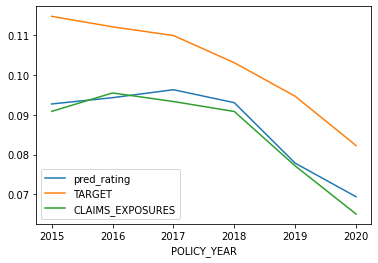

<AxesSubplot:xlabel='POLICY_YEAR'>

In [0]:
tmp[['pred_rating','TARGET','CLAIMS_EXPOSURES']].plot()
# tmp['EARNED_EXPOSURES'].plot(kind='bar')

In [0]:
# Business in California
tmp = df[df['REGION']=='CALIFORNIA'].groupby('POLICY_YEAR').agg({'POLICYID': np.size,'EARNED_EXPOSURES': np.sum, 'CLAIM_COUNT_PAID': np.sum, 'TARGET': np.mean, 'pred_claim_rating': np.sum})
tmp['FACT_CLAIMS_EXPOSURES'] = tmp['CLAIM_COUNT_PAID'] / tmp['EARNED_EXPOSURES']
tmp['PRED_CLAIMS_EXPOSURES'] = tmp['pred_claim_rating'] / tmp['EARNED_EXPOSURES']

tmp['95_pred_CI'] = [1.96 * np.sqrt(np.sum((df[(df['POLICY_YEAR']==y)]['pred_claim_rating'] - tmp.loc[y, 'pred_claim_rating'])**2) / tmp.loc[y, 'POLICYID'] ) for y in tmp.index]
tmp['95_fact_CI'] = [1.96 * np.sqrt(np.sum((df[(df['POLICY_YEAR']==y)]['TARGET'] - tmp.loc[y, 'FACT_CLAIMS_EXPOSURES'])**2) / tmp.loc[y, 'POLICYID'] ) for y in tmp.index]


print('Time Series - Predicted Frequency - 95% CI:', 1.96*tmp['pred_claim_rating'].std() )
print('Time Series - Fact Frequency - 95% CI:', 1.96*tmp['FACT_CLAIMS_EXPOSURES'].std() )

tmp

Time Series - Predicted Frequency - 95% CI: 250.77007768945631
Time Series - Fact Frequency - 95% CI: 0.030973593113760387
Out[78]:

,POLICYID,EARNED_EXPOSURES,CLAIM_COUNT_PAID,TARGET,pred_claim_rating,FACT_CLAIMS_EXPOSURES,PRED_CLAIMS_EXPOSURES,95_pred_CI,95_fact_CI
POLICY_YEAR,,,,,,,,,
2015,5791,4695.782101,444,0.111815,445.738246,0.094553,0.094923,2143.928001,6.105197
2016,6153,5055.579265,530,0.111531,495.459111,0.104835,0.098002,2156.364186,3.544580
2017,5373,4440.390948,466,0.111283,446.967406,0.104946,0.100659,1998.077711,3.895867
2018,4020,3277.356174,334,0.104602,331.093721,0.101911,0.101025,1636.822527,3.140671
2019,3351,2636.052075,223,0.096818,222.259033,0.084596,0.084315,1111.986183,3.644536
2020,3280,2621.871585,169,0.071129,189.964470,0.064458,0.072454,958.412619,5.308138


In [0]:
# Business in California + New Business
tmp = df[(df['REGION']=='CALIFORNIA')&(df['POLICYISSUETYPE']=='New')].groupby('POLICY_YEAR').agg({'POLICYID': np.size,'EARNED_EXPOSURES': np.sum, 'CLAIM_COUNT_PAID': np.sum, 'TARGET': np.mean, 'pred_claim_rating': np.sum})
tmp['FACT_CLAIMS_EXPOSURES'] = tmp['CLAIM_COUNT_PAID'] / tmp['EARNED_EXPOSURES']
tmp['PRED_CLAIMS_EXPOSURES'] = tmp['pred_claim_rating'] / tmp['EARNED_EXPOSURES']

tmp['95_pred_CI'] = [1.96 * np.sqrt(np.sum((df[(df['POLICY_YEAR']==y)]['pred_claim_rating'] - tmp.loc[y, 'pred_claim_rating'])**2) / tmp.loc[y, 'POLICYID'] ) for y in tmp.index]
tmp['95_fact_CI'] = [1.96 * np.sqrt(np.sum((df[(df['POLICY_YEAR']==y)]['TARGET'] - tmp.loc[y, 'FACT_CLAIMS_EXPOSURES'])**2) / tmp.loc[y, 'POLICYID'] ) for y in tmp.index]


print('Time Series - Predicted Frequency - 95% CI:', 1.96*tmp['pred_claim_rating'].std() )
print('Time Series - Fact Frequency - 95% CI:', 1.96*tmp['FACT_CLAIMS_EXPOSURES'].std() )

tmp

Time Series - Predicted Frequency - 95% CI: 123.85161244841733
Time Series - Fact Frequency - 95% CI: 0.049980880670070345
Out[79]:

,POLICYID,EARNED_EXPOSURES,CLAIM_COUNT_PAID,TARGET,pred_claim_rating,FACT_CLAIMS_EXPOSURES,PRED_CLAIMS_EXPOSURES,95_pred_CI,95_fact_CI
POLICY_YEAR,,,,,,,,,
2015,2904,2353.491515,260,0.136626,230.278312,0.110474,0.097845,1563.859907,8.620368
2016,2435,1946.028614,231,0.125565,198.193930,0.118703,0.101845,1370.893033,5.634508
2017,1562,1238.034615,138,0.116632,125.323042,0.111467,0.101227,1038.605589,7.225463
2018,1114,878.355110,128,0.142707,92.748801,0.145727,0.105594,870.540141,5.979565
2019,1203,935.912998,87,0.103347,82.635573,0.092957,0.088294,689.711246,6.082140
2020,1511,1191.338800,83,0.077265,87.258355,0.069670,0.073244,648.413571,7.820162


In [0]:
# Business in California + New Business + Low Exposure Segment (lower 10% quantile)
tmp = df[(df['REGION']=='CALIFORNIA')&(df['POLICYISSUETYPE']=='New')&(df['EARNED_EXPOSURES']<=df['EARNED_EXPOSURES'].quantile(0.1))].groupby('POLICY_YEAR').agg({'POLICYID': np.size,'EARNED_EXPOSURES': np.sum, 'CLAIM_COUNT_PAID': np.sum, 'TARGET': np.mean, 'pred_claim_rating': np.sum})
tmp['FACT_CLAIMS_EXPOSURES'] = tmp['CLAIM_COUNT_PAID'] / tmp['EARNED_EXPOSURES']
tmp['PRED_CLAIMS_EXPOSURES'] = tmp['pred_claim_rating'] / tmp['EARNED_EXPOSURES']

tmp['95_pred_CI'] = [1.96 * np.sqrt(np.sum((df[(df['POLICY_YEAR']==y)]['pred_claim_rating'] - tmp.loc[y, 'pred_claim_rating'])**2) / tmp.loc[y, 'POLICYID'] ) for y in tmp.index]
tmp['95_fact_CI'] = [1.96 * np.sqrt(np.sum((df[(df['POLICY_YEAR']==y)]['TARGET'] - tmp.loc[y, 'FACT_CLAIMS_EXPOSURES'])**2) / tmp.loc[y, 'POLICYID'] ) for y in tmp.index]


print('Time Series - Predicted Frequency - 95% CI:', 1.96*tmp['pred_claim_rating'].std() )
print('Time Series - Fact Frequency - 95% CI:', 1.96*tmp['FACT_CLAIMS_EXPOSURES'].std() )

tmp

Time Series - Predicted Frequency - 95% CI: 0.806357825657028
Time Series - Fact Frequency - 95% CI: 0.22514678978090816
Out[80]:

,POLICYID,EARNED_EXPOSURES,CLAIM_COUNT_PAID,TARGET,pred_claim_rating,FACT_CLAIMS_EXPOSURES,PRED_CLAIMS_EXPOSURES,95_pred_CI,95_fact_CI
POLICY_YEAR,,,,,,,,,
2015,190,17.262879,6,0.404067,1.729169,0.347567,0.100167,44.070070,34.263879
2016,168,15.402314,3,0.178465,1.576466,0.194776,0.102353,39.635426,21.560800
2017,131,11.997176,0,0.000000,1.226434,0.000000,0.102227,33.012945,25.147608
2018,95,7.936986,1,0.061969,0.820186,0.125992,0.103337,24.114893,20.443521
2019,96,8.758810,2,0.152144,0.771740,0.228342,0.088110,21.098930,21.890308
2020,117,11.525566,2,0.140481,0.879702,0.173527,0.076326,22.129488,28.206694


In [0]:
[np.sqrt(np.sum((df[(df['POLICY_YEAR']==y)&(df['REGION']=='CALIFORNIA')&(df['POLICYISSUETYPE']=='New')&(df['EARNED_EXPOSURES']<=df['EARNED_EXPOSURES'].quantile(0.1))]['pred_rating'] - tmp.loc[y, 'pred_rating'])**2) / tmp.loc[y, 'POLICYID'] ) for y in tmp.index]

Out[24]: [0.01435203315795243,
 0.015236528457615322,
 0.020719436043268664,
 0.014679798860094646,
 0.017825729735296086,
 0.012529979180293199]

In [0]:
# sampling random 4000 units which corresponds to ~3000 Earned Exposures 
exp_total = []
pred_total = []
fact_total = []

exp_cali = []
pred_cali = []
fact_cali = []

exp_cali_new = []
pred_cali_new = []
fact_cali_new = []

exp_cali_new_low_exp = []
pred_cali_new_low_exp = []
fact_cali_new_low_exp = []

for i in range(0,10000):
  smpl = df[df['POLICY_YEAR']==2016].sample(4000)
  
  exp_total.append(smpl['EARNED_EXPOSURES'].sum())
  pred_total.append(smpl['pred_claim_rating'].sum()/smpl['EARNED_EXPOSURES'].sum())
  fact_total.append(smpl['CLAIM_COUNT_PAID'].sum()/smpl['EARNED_EXPOSURES'].sum())

  exp_cali.append(smpl[smpl['REGION']=='CALIFORNIA']['EARNED_EXPOSURES'].sum())
  pred_cali.append(smpl[smpl['REGION']=='CALIFORNIA']['pred_claim_rating'].sum()/smpl[smpl['REGION']=='CALIFORNIA']['EARNED_EXPOSURES'].sum())
  fact_cali.append(smpl[smpl['REGION']=='CALIFORNIA']['CLAIM_COUNT_PAID'].sum()/smpl[smpl['REGION']=='CALIFORNIA']['EARNED_EXPOSURES'].sum())
  
  exp_cali_new.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')]['EARNED_EXPOSURES'].sum())
  pred_cali_new.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')]['pred_claim_rating'].sum()/smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')]['EARNED_EXPOSURES'].sum())
  fact_cali_new.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')]['CLAIM_COUNT_PAID'].sum()/smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')]['EARNED_EXPOSURES'].sum())

  
  exp_cali_new_low_exp.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['EARNED_EXPOSURES'].sum())
  pred_cali_new_low_exp.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['pred_claim_rating'].sum()/smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['EARNED_EXPOSURES'].sum())
  fact_cali_new_low_exp.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['CLAIM_COUNT_PAID'].sum()/smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['EARNED_EXPOSURES'].sum())
  
# exp = []
# smpl['EARNED_EXPOSURES'].sum()

Out[82]:

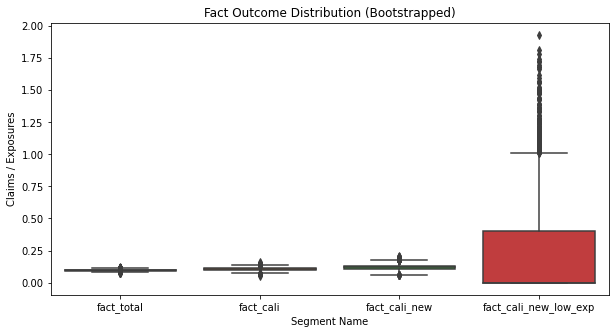

Text(0.5, 0, 'Segment Name')

In [0]:
t = pd.DataFrame()
t['fact_total'] = fact_total
t['fact_cali'] = fact_cali
t['fact_cali_new'] = fact_cali_new
t['fact_cali_new_low_exp'] = fact_cali_new_low_exp

plt.figure(figsize = (10,5))
sns.boxplot(data=t)
plt.title('Fact Outcome Distribution (Bootstrapped)')
plt.ylabel('Claims / Exposures')
plt.xlabel('Segment Name')

Out[83]:

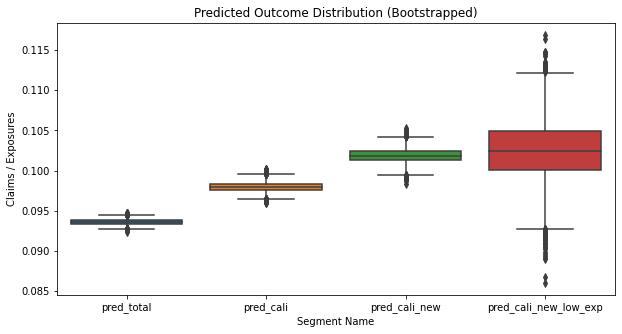

Text(0.5, 0, 'Segment Name')

In [0]:
t = pd.DataFrame()
t['pred_total'] = pred_total
t['pred_cali'] = pred_cali
t['pred_cali_new'] = pred_cali_new
t['pred_cali_new_low_exp'] = pred_cali_new_low_exp

plt.figure(figsize = (10,5))
sns.boxplot(data=t)
plt.title('Predicted Outcome Distribution (Bootstrapped)')
plt.ylabel('Claims / Exposures')
plt.xlabel('Segment Name')

Out[84]:

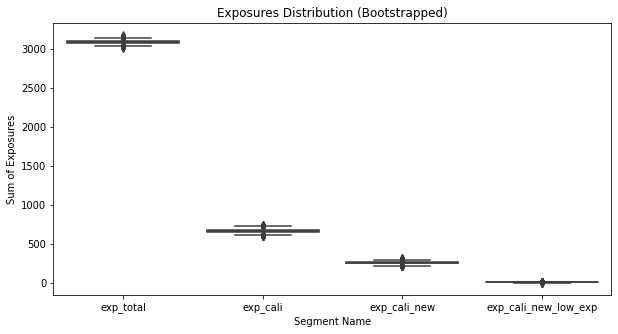

Text(0.5, 0, 'Segment Name')

In [0]:
t = pd.DataFrame()
t['exp_total'] = exp_total
t['exp_cali'] = exp_cali
t['exp_cali_new'] = exp_cali_new
t['exp_cali_new_low_exp'] = exp_cali_new_low_exp

plt.figure(figsize = (10,5))
sns.boxplot(data=t)
plt.title('Exposures Distribution (Bootstrapped)')
plt.ylabel('Sum of Exposures')
plt.xlabel('Segment Name')

========PREDICTED SCORES=============
3k Exposure 2016 total. STD - Predicted Score 0.00031105337416536036
3k Exposure 2016 Cali. STD - Predicted Score 0.0005709163177523012
3k Exposure 2016 Cali New. STD - Predicted Score 0.0008884530296099173
3k Exposure 2016 Cali New Low Exp. STD - Predicted Score 0.003620604181518497
3k Exposure 2016 total. MEAN - Predicted Score 0.09361876884298127
3k Exposure 2016 Cali. MEAN - Predicted Score 0.09800537121260347
3k Exposure 2016 Cali New. MEAN - Predicted Score 0.1018541679272237
3k Exposure 2016 Cali New Low Exp. MEAN - Predicted Score 0.10245198594679807
========FACT OUTCOME================
3k Exposure 2016 total. STD - Predicted Score 0.0053932608113081764
3k Exposure 2016 Cali. STD - Predicted Score 0.012123501231329728
3k Exposure 2016 Cali New. STD - Predicted Score 0.02077399953422681
3k Exposure 2016 Cali New Low Exp. STD - Predicted Score 0.2879297354779821
3k Exposure 2016 total. MEAN - Predicted Score 0.0955312764989998
3k Exposure 2016 Cali. MEAN - Predicted Score 0.10508949982820466
3k Exposure 2016 Cali New. MEAN - Predicted Score 0.11896234658324834
3k Exposure 2016 Cali New Low Exp. MEAN - Predicted Score 0.21015381371105474
========EXPOSURES================
3k Exposure 2016 total. STD - Predicted Score 19.577958640063482
3k Exposure 2016 Cali. STD - Predicted Score 20.962758386767213
3k Exposure 2016 Cali New. STD - Predicted Score 13.751982628625875
3k Exposure 2016 Cali New Low Exp. STD - Predicted Score 0.5468584374891183
3k Exposure 2016 total. MEAN - Predicted Score 3088.1120548871377
3k Exposure 2016 Cali. MEAN - Predicted Score 666.1623580482499
3k Exposure 2016 Cali New. MEAN - Predicted Score 256.66539008335445
3k Exposure 2016 Cali New Low Exp. MEAN - Predicted Score 2.4010181812044658

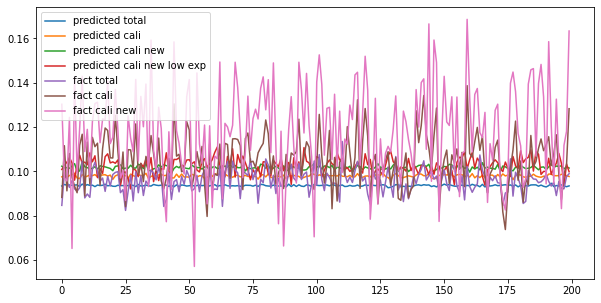

In [0]:
plt.figure(figsize=(10,5))

plt.plot(pred_total[:200], label='predicted total')
plt.plot(pred_cali[:200], label='predicted cali')
plt.plot(pred_cali_new[:200], label='predicted cali new')
plt.plot(pred_cali_new_low_exp[:200], label='predicted cali new low exp')
plt.plot(fact_total[:200], label='fact total')
plt.plot(fact_cali[:200], label='fact cali')
plt.plot(fact_cali_new[:200], label='fact cali new')
# plt.plot(fact_cali_new_low_exp[:200], label='fact cali new')

plt.legend()

print('========PREDICTED SCORES=============')
print('3k Exposure 2016 total. STD - Predicted Score', np.std(pred_total))
print('3k Exposure 2016 Cali. STD - Predicted Score', np.std(pred_cali))
print('3k Exposure 2016 Cali New. STD - Predicted Score', np.std(pred_cali_new))
print('3k Exposure 2016 Cali New Low Exp. STD - Predicted Score', np.std(pred_cali_new_low_exp))

print('3k Exposure 2016 total. MEAN - Predicted Score', np.mean(pred_total))
print('3k Exposure 2016 Cali. MEAN - Predicted Score', np.mean(pred_cali))
print('3k Exposure 2016 Cali New. MEAN - Predicted Score', np.mean(pred_cali_new))
print('3k Exposure 2016 Cali New Low Exp. MEAN - Predicted Score', np.mean(pred_cali_new_low_exp))

print('========FACT OUTCOME================')
print('3k Exposure 2016 total. STD - Predicted Score', np.std(fact_total))
print('3k Exposure 2016 Cali. STD - Predicted Score', np.std(fact_cali))
print('3k Exposure 2016 Cali New. STD - Predicted Score', np.std(fact_cali_new))
print('3k Exposure 2016 Cali New Low Exp. STD - Predicted Score', np.std(fact_cali_new_low_exp))

print('3k Exposure 2016 total. MEAN - Predicted Score', np.mean(fact_total))
print('3k Exposure 2016 Cali. MEAN - Predicted Score', np.mean(fact_cali))
print('3k Exposure 2016 Cali New. MEAN - Predicted Score', np.mean(fact_cali_new))
print('3k Exposure 2016 Cali New Low Exp. MEAN - Predicted Score', np.mean(fact_cali_new_low_exp))

print('========EXPOSURES================')
print('3k Exposure 2016 total. STD - Predicted Score', np.std(exp_total))
print('3k Exposure 2016 Cali. STD - Predicted Score', np.std(exp_cali))
print('3k Exposure 2016 Cali New. STD - Predicted Score', np.std(exp_cali_new))
print('3k Exposure 2016 Cali New Low Exp. STD - Predicted Score', np.std(exp_cali_new_low_exp))

print('3k Exposure 2016 total. MEAN - Predicted Score', np.mean(exp_total))
print('3k Exposure 2016 Cali. MEAN - Predicted Score', np.mean(exp_cali))
print('3k Exposure 2016 Cali New. MEAN - Predicted Score', np.mean(exp_cali_new))
print('3k Exposure 2016 Cali New Low Exp. MEAN - Predicted Score', np.mean(exp_cali_new_low_exp))



Out[86]:

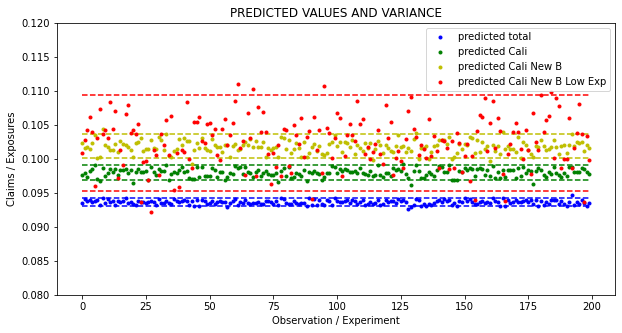

<matplotlib.legend.Legend at 0x7ffa6494da30>

In [0]:
size_param = 200

plt.figure(figsize=(10,5))
plt.title('PREDICTED VALUES AND VARIANCE')
plt.plot(pred_total[:size_param], 'b.' , label='predicted total')
plt.plot([np.quantile(pred_total,0.025)]*size_param, 'b--')
plt.plot([np.quantile(pred_total,0.975)]*size_param, 'b--')

plt.plot(pred_cali[:size_param], 'g.' , label='predicted Cali')
plt.plot([np.quantile(pred_cali,0.025)]*size_param, 'g--')
plt.plot([np.quantile(pred_cali,0.975)]*size_param, 'g--')

plt.plot(pred_cali_new[:size_param], 'y.' , label='predicted Cali New B')
plt.plot([np.quantile(pred_cali_new,0.025)]*size_param, 'y--')
plt.plot([np.quantile(pred_cali_new,0.975)]*size_param, 'y--')

plt.plot(pred_cali_new_low_exp[:size_param], 'r.' , label='predicted Cali New B Low Exp')
plt.plot([np.quantile(pred_cali_new_low_exp,0.025)]*size_param, 'r--')
plt.plot([np.quantile(pred_cali_new_low_exp,0.975)]*size_param, 'r--')
plt.ylim(0.08,0.12)
plt.xlabel('Observation / Experiment')
plt.ylabel('Claims / Exposures')
plt.legend()

Out[87]:

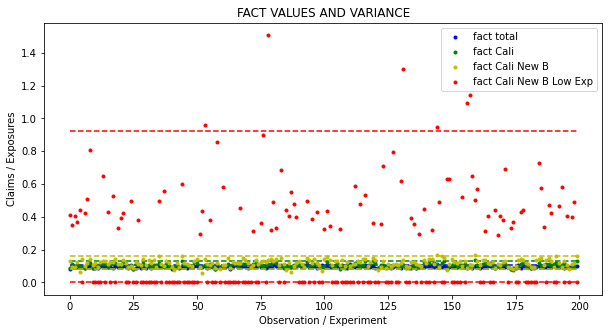

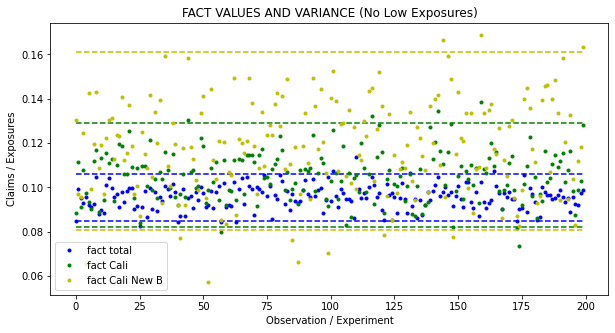

<matplotlib.legend.Legend at 0x7ffa64852be0>

In [0]:
size_param = 200

plt.figure(figsize=(10,5))
plt.title('FACT VALUES AND VARIANCE')
plt.plot(fact_total[:size_param], 'b.' , label='fact total')
plt.plot([np.quantile(fact_total,0.025)]*size_param, 'b--')
plt.plot([np.quantile(fact_total,0.975)]*size_param, 'b--')

plt.plot(fact_cali[:size_param], 'g.' , label='fact Cali')
plt.plot([np.quantile(fact_cali,0.025)]*size_param, 'g--')
plt.plot([np.quantile(fact_cali,0.975)]*size_param, 'g--')

plt.plot(fact_cali_new[:size_param], 'y.' , label='fact Cali New B')
plt.plot([np.quantile(fact_cali_new,0.025)]*size_param, 'y--')
plt.plot([np.quantile(fact_cali_new,0.975)]*size_param, 'y--')

plt.plot(fact_cali_new_low_exp[:size_param], 'r.' , label='fact Cali New B Low Exp')
plt.plot([np.quantile(fact_cali_new_low_exp,0.025)]*size_param, 'r--')
plt.plot([np.quantile(fact_cali_new_low_exp,0.975)]*size_param, 'r--')
# plt.ylim(0.0,0.52)
plt.xlabel('Observation / Experiment')
plt.ylabel('Claims / Exposures')
plt.legend()
plt.plot()


plt.figure(figsize=(10,5))
plt.title('FACT VALUES AND VARIANCE (No Low Exposures)')
plt.plot(fact_total[:size_param], 'b.' , label='fact total')
plt.plot([np.quantile(fact_total,0.025)]*size_param, 'b--')
plt.plot([np.quantile(fact_total,0.975)]*size_param, 'b--')

plt.plot(fact_cali[:size_param], 'g.' , label='fact Cali')
plt.plot([np.quantile(fact_cali,0.025)]*size_param, 'g--')
plt.plot([np.quantile(fact_cali,0.975)]*size_param, 'g--')

plt.plot(fact_cali_new[:size_param], 'y.' , label='fact Cali New B')
plt.plot([np.quantile(fact_cali_new,0.025)]*size_param, 'y--')
plt.plot([np.quantile(fact_cali_new,0.975)]*size_param, 'y--')
# plt.ylim(0.0,0.52)
plt.xlabel('Observation / Experiment')
plt.ylabel('Claims / Exposures')
plt.legend()

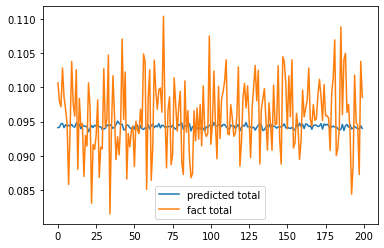

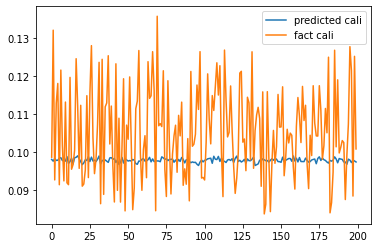

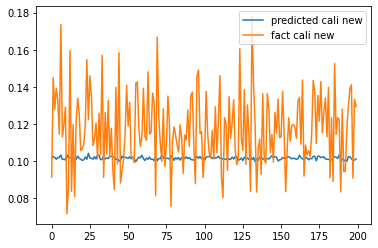

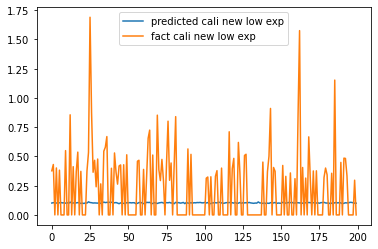

In [0]:
# plt.figure(figsize=(10,5))

plt.plot(pred_total[:200], label='predicted total')
plt.plot(fact_total[:200], label='fact total')
plt.legend()
plt.show()

plt.plot(pred_cali[:200], label='predicted cali')
plt.plot(fact_cali[:200], label='fact cali')
plt.legend()
plt.show()

plt.plot(pred_cali_new[:200], label='predicted cali new')
plt.plot(fact_cali_new[:200], label='fact cali new')
plt.legend()
plt.show()

plt.plot(pred_cali_new_low_exp[:200], label='predicted cali new low exp')
plt.plot(fact_cali_new_low_exp[:200], label='fact cali new low exp')
plt.legend()
plt.show()

# plt.legend()

Out[50]:

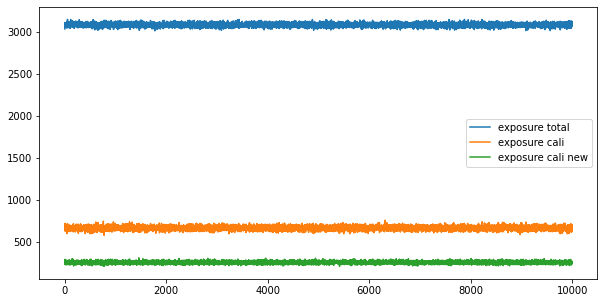

<matplotlib.legend.Legend at 0x7f42a348d130>

In [0]:
plt.figure(figsize = (10,5))
plt.plot(exp_total, label='exposure total')
plt.plot(exp_cali, label='exposure cali')
plt.plot(exp_cali_new, label='exposure cali new')
plt.legend()



In [0]:
dic = ['total', 'Cali', 'Cali_New_B', 'Cali_New_B_Low_Exp']
mean_pred = [np.mean(pred_total),np.mean(pred_cali), np.mean(pred_cali_new), np.mean(pred_cali_new_low_exp)]
std_pred = [np.std(pred_total),np.std(pred_cali), np.std(pred_cali_new), np.std(pred_cali_new_low_exp)]

mean_fact = [np.mean(fact_total),np.mean(fact_cali), np.mean(fact_cali_new), np.mean(fact_cali_new_low_exp)]
std_fact = [np.std(fact_total),np.std(fact_cali), np.std(fact_cali_new), np.std(fact_cali_new_low_exp)]

mean_exp = [np.mean(exp_total),np.mean(exp_cali), np.mean(exp_cali_new), np.mean(exp_cali_new_low_exp)]
std_exp = [np.std(exp_total),np.std(exp_cali), np.std(exp_cali_new), np.std(exp_cali_new_low_exp)]

res = pd.DataFrame()
res['name'] = dic
res['predicted_mean'] = mean_pred
res['predicted_std'] = std_pred
res['fact_mean'] = mean_fact
res['fact_std'] = std_fact
res['exposure_mean'] = mean_exp
res['exposure_std'] = std_exp

res

Out[88]:

,name,predicted_mean,predicted_std,fact_mean,fact_std,exposure_mean,exposure_std
0,total,0.093619,0.000311,0.095531,0.005393,3088.112055,19.577959
1,Cali,0.098005,0.000571,0.105089,0.012124,666.162358,20.962758
2,Cali_New_B,0.101854,0.000888,0.118962,0.020774,256.665390,13.751983
3,Cali_New_B_Low_Exp,0.102452,0.003621,0.210154,0.287930,2.401018,0.546858


In [0]:
# sampling random 4000 units which corresponds to ~3000 Earned Exposures 
sample_size = 4000

final = pd.DataFrame()

for sample_size in [50, 100, 500, 1000, 5000, 10000]:
  exp_total = []
  pred_total = []
  fact_total = []

  exp_cali = []
  pred_cali = []
  fact_cali = []

  exp_cali_new = []
  pred_cali_new = []
  fact_cali_new = []

  exp_cali_new_low_exp = []
  pred_cali_new_low_exp = []
  fact_cali_new_low_exp = []

  for i in range(0,1000):
    smpl = df[df['POLICY_YEAR']==2016].sample(sample_size)
  
    exp_total.append(smpl['EARNED_EXPOSURES'].sum())
    pred_total.append(smpl['pred_claim_rating'].sum()/smpl['EARNED_EXPOSURES'].sum())
    fact_total.append(smpl['CLAIM_COUNT_PAID'].sum()/smpl['EARNED_EXPOSURES'].sum())

    exp_cali.append(smpl[smpl['REGION']=='CALIFORNIA']['EARNED_EXPOSURES'].sum())
    pred_cali.append(smpl[smpl['REGION']=='CALIFORNIA']['pred_claim_rating'].sum()/smpl[smpl['REGION']=='CALIFORNIA']['EARNED_EXPOSURES'].sum())
    fact_cali.append(smpl[smpl['REGION']=='CALIFORNIA']['CLAIM_COUNT_PAID'].sum()/smpl[smpl['REGION']=='CALIFORNIA']['EARNED_EXPOSURES'].sum())

    exp_cali_new.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')]['EARNED_EXPOSURES'].sum())
    pred_cali_new.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')]['pred_claim_rating'].sum()/smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')]['EARNED_EXPOSURES'].sum())
    fact_cali_new.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')]['CLAIM_COUNT_PAID'].sum()/smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')]['EARNED_EXPOSURES'].sum())


    exp_cali_new_low_exp.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['EARNED_EXPOSURES'].sum())
    pred_cali_new_low_exp.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['pred_claim_rating'].sum()/smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['EARNED_EXPOSURES'].sum())
    fact_cali_new_low_exp.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['CLAIM_COUNT_PAID'].sum()/smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['EARNED_EXPOSURES'].sum())
  

  # creating summary table
  dic = ['total', 'Cali', 'Cali_New_B', 'Cali_New_B_Low_Exp']
  mean_pred = [np.mean(pred_total),np.mean(pred_cali), np.mean(pred_cali_new), np.mean(pred_cali_new_low_exp)]
  std_pred = [np.std(pred_total),np.std(pred_cali), np.std(pred_cali_new), np.std(pred_cali_new_low_exp)]

  mean_fact = [np.mean(fact_total),np.mean(fact_cali), np.mean(fact_cali_new), np.mean(fact_cali_new_low_exp)]
  std_fact = [np.std(fact_total),np.std(fact_cali), np.std(fact_cali_new), np.std(fact_cali_new_low_exp)]

  mean_exp = [np.mean(exp_total),np.mean(exp_cali), np.mean(exp_cali_new), np.mean(exp_cali_new_low_exp)]
  std_exp = [np.std(exp_total),np.std(exp_cali), np.std(exp_cali_new), np.std(exp_cali_new_low_exp)]

  res = pd.DataFrame()
  res['name'] = dic
  res['predicted_mean'] = mean_pred
  res['predicted_std'] = std_pred
  res['fact_mean'] = mean_fact
  res['fact_std'] = std_fact
  res['exposure_mean'] = mean_exp
  res['exposure_std'] = std_exp
  res['sample_size'] = sample_size

  final = final.append(res)
  
final

<command-3255006515671153>:40: RuntimeWarning: invalid value encountered in double_scalars
 pred_cali_new_low_exp.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['pred_claim_rating'].sum()/smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['EARNED_EXPOSURES'].sum())
<command-3255006515671153>:41: RuntimeWarning: invalid value encountered in true_divide
 fact_cali_new_low_exp.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['CLAIM_COUNT_PAID'].sum()/smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['EARNED_EXPOSURES'].sum())
<command-3255006515671153>:40: RuntimeWarning: invalid value encountered in double_scalars
 pred_cali_new_low_exp.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['pred_claim_rating'].sum()/smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['EARNED_EXPOSURES'].sum())
<command-3255006515671153>:41: RuntimeWarning: invalid value encountered in true_divide
 fact_cali_new_low_exp.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['CLAIM_COUNT_PAID'].sum()/smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['EARNED_EXPOSURES'].sum())
<command-3255006515671153>:40: RuntimeWarning: invalid value encountered in double_scalars
 pred_cali_new_low_exp.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['pred_claim_rating'].sum()/smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['EARNED_EXPOSURES'].sum())
<command-3255006515671153>:41: RuntimeWarning: invalid value encountered in true_divide
 fact_cali_new_low_exp.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['CLAIM_COUNT_PAID'].sum()/smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['EARNED_EXPOSURES'].sum())
<command-3255006515671153>:40: RuntimeWarning: invalid value encountered in double_scalars
 pred_cali_new_low_exp.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['pred_claim_rating'].sum()/smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['EARNED_EXPOSURES'].sum())
<command-3255006515671153>:41: RuntimeWarning: invalid value encountered in true_divide
 fact_cali_new_low_exp.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['CLAIM_COUNT_PAID'].sum()/smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['EARNED_EXPOSURES'].sum())
<command-3255006515671153>:40: RuntimeWarning: invalid value encountered in double_scalars
 pred_cali_new_low_exp.append(smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['pred_claim_rating'].sum()/smpl[(smpl['REGION']=='CALIFORNIA')&(smpl['POLICYISSUETYPE']=='New')&(smpl['EARNED_EXPOSURES']<=smpl['EARNED_EXPOSURES'].quantile(0.1))]['E

,name,predicted_mean,predicted_std,fact_mean,fact_std,exposure_mean,exposure_std,sample_size
0,total,0.093697,0.003021,0.097205,0.050502,38.547298,2.294613,50
1,Cali,0.097908,0.005879,0.111289,0.131876,8.372542,2.603907,50
2,Cali_New_B,NaN,NaN,NaN,NaN,3.210455,1.694397,50
3,Cali_New_B_Low_Exp,NaN,NaN,NaN,NaN,0.037020,0.082749,50
0,total,0.093499,0.002037,0.095603,0.036195,77.021634,3.371512,100
1,Cali,0.097891,0.003892,0.103997,0.086357,16.602061,3.717609,100
2,Cali_New_B,NaN,NaN,NaN,NaN,6.302324,2.302235,100
3,Cali_New_B_Low_Exp,NaN,NaN,NaN,NaN,0.072109,0.106080,100
0,total,0.093610,0.000936,0.095272,0.016422,385.926124,7.709316,500
1,Cali,0.097942,0.001676,0.103688,0.036642,83.335615,7.636645,500


In [0]:
1+3